### Further clean RISK variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
sys.path.append("../../")
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel
from tqdm import tqdm

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

0

In [6]:
# df_list = drop_temp_columns(df_list)

In [7]:
START = time.time()

### Read Data

In [8]:
%%time
train = read_file(f"../{RAW_TRAIN_PARQUET_PATH}/risk.parquet")
test = read_file(f"../{RAW_TEST_PARQUET_PATH}/risk.parquet")

Shape of data: (5531451, 30)
Shape of data: (11363762, 30)
CPU times: user 4.31 s, sys: 6.15 s, total: 10.5 s
Wall time: 7.41 s


In [9]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 2.61 s, sys: 950 ms, total: 3.56 s
Wall time: 4.85 s


In [10]:
del test

In [11]:
%%time
labels = pd.read_csv(f"../{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 782 ms, sys: 370 ms, total: 1.15 s
Wall time: 1.15 s


In [12]:
train.shape, public_test.shape, private_test.shape

((5531451, 31), (5719469, 30), (5644293, 30))

In [13]:
print(sorted(get_cols(train, ["R_"])))

['R_1', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_2', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9']


In [14]:
train["target"].mean()

0.24909720794778803

In [15]:
df_list = [train, public_test, private_test]

### R_1 (Done)

In [16]:
# plot_target_check(train, "R_1", q=50, use_raw_bin=True)

In [17]:
%%time
df_list = round_dfs(df_list, col="R_1", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 288 ms, sys: 1.05 s, total: 1.34 s
Wall time: 2.22 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Top & Bottom 1% are dropped from this chart


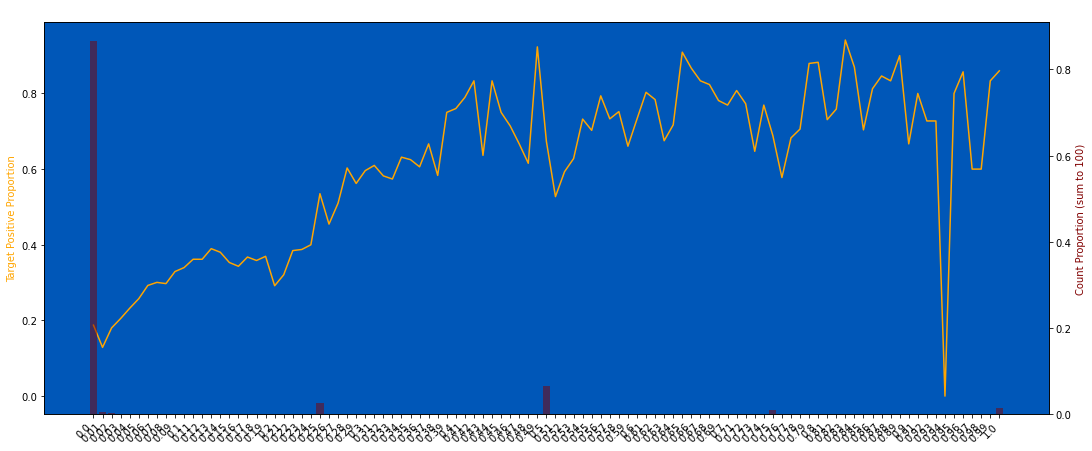

In [18]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True)

**Comments:**
- Should group this variable based on the interval of 0.25, i.e. (0, 0.25, 0.5, 0.75, 1, 1.25, ...)

In [19]:
for df in df_list:
    df["R_1_"] = (df["R_1"] * 4).round(0)

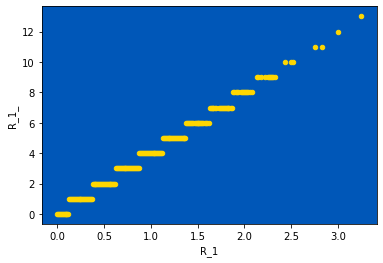

In [20]:
check_binning(train, "R_1", end=20000)

In [21]:
for df in df_list:
    df["R_1"] = (df["R_1"] * 4).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


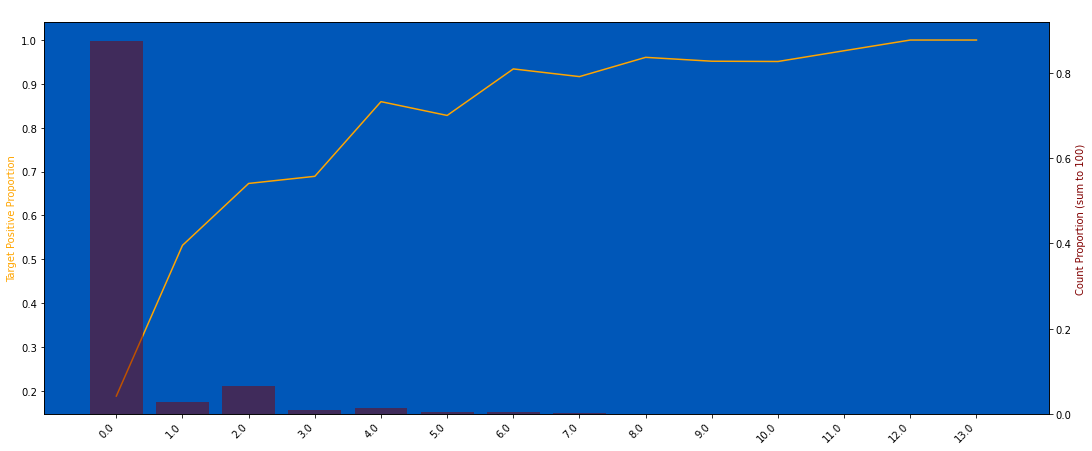

In [22]:
plot_target_check(train, "R_1", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True, without_drop_tail=True)

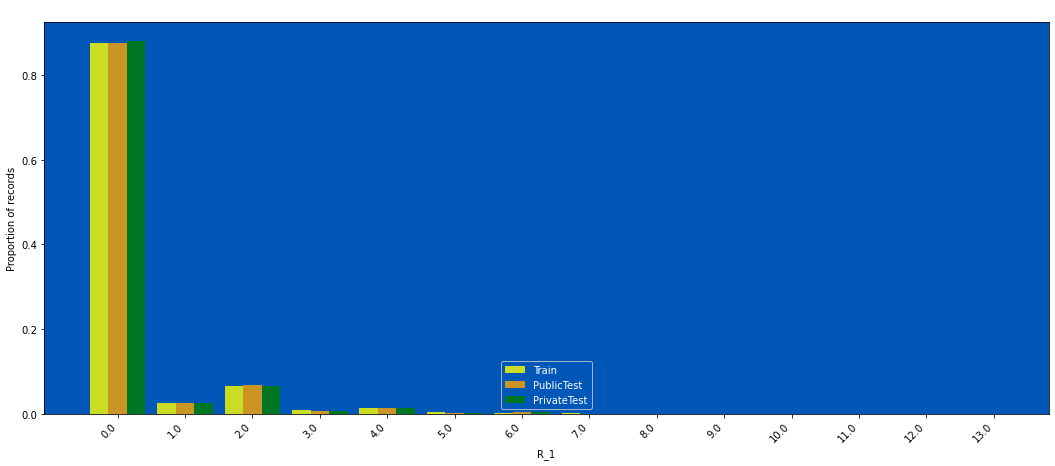

In [23]:
plot_train_test_distribution(df_list, "R_1", nunique_thr=10000, without_drop_tail=True)

### R_2 (Done)

In [24]:
# plot_target_check(train, "R_2", q=50, use_raw_bin=True)

In [25]:
%%time
df_list = round_dfs(df_list, col="R_2", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 282 ms, sys: 857 ms, total: 1.14 s
Wall time: 2.04 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


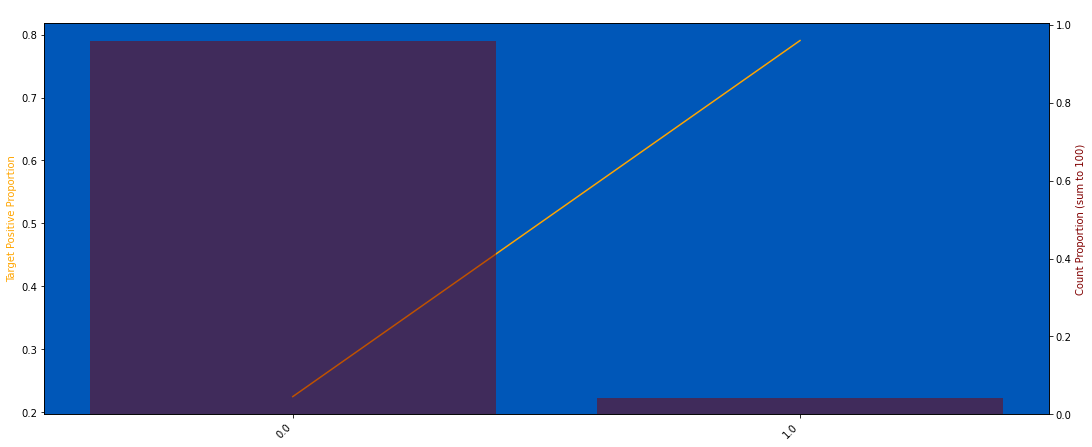

In [26]:
plot_target_check(train, "R_2", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


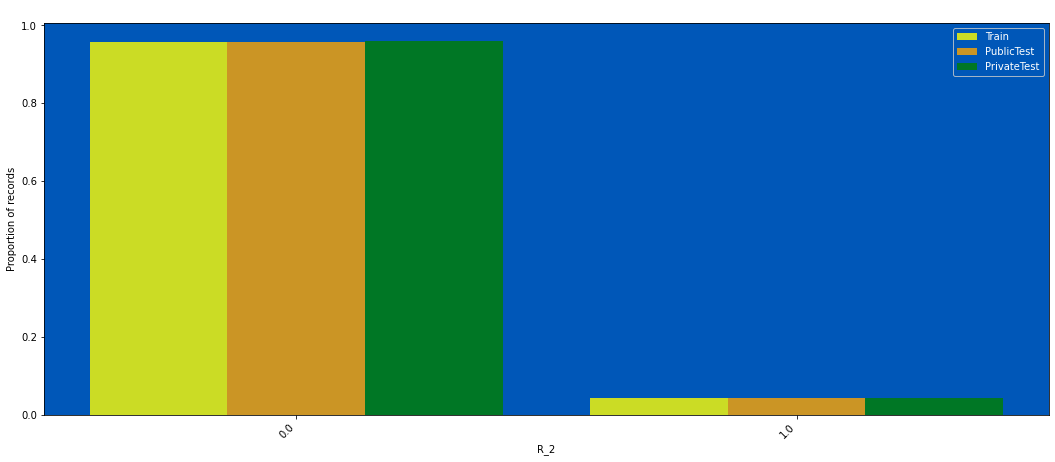

In [27]:
plot_train_test_distribution(df_list, "R_2", nunique_thr=100)

### R_3

In [28]:
# plot_target_check(train, "R_3", q=50, use_raw_bin=True)

In [29]:
%%time
df_list = round_dfs(df_list, col="R_3", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 320 ms, sys: 892 ms, total: 1.21 s
Wall time: 2.14 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


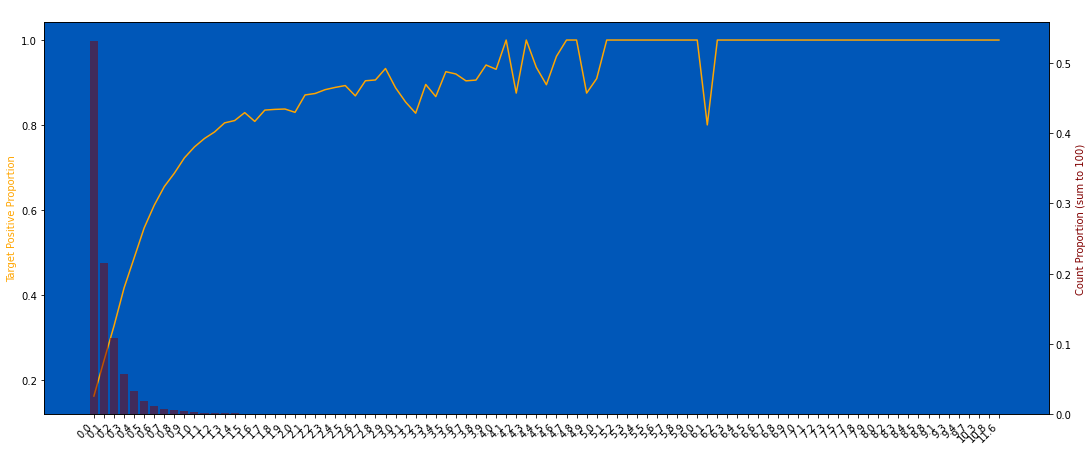

In [30]:
plot_target_check(train, "R_3", q=50, use_raw_bin=True, nunique_thr=1500, strfy_x=True, without_drop_tail=True)

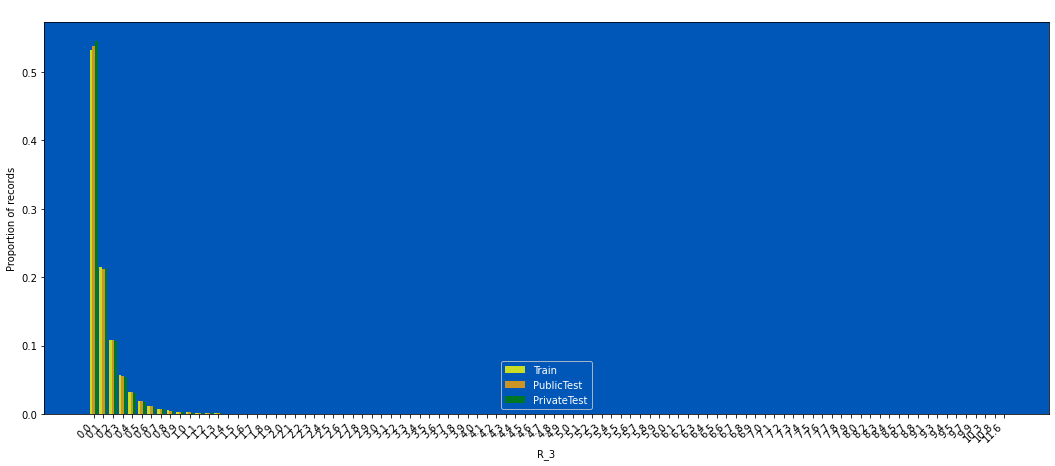

In [31]:
plot_train_test_distribution(df_list, "R_3", nunique_thr=100, without_drop_tail=True)

### R_4 (Done)

In [32]:
# plot_target_check(train, "R_4", q=50, use_raw_bin=True)

In [33]:
%%time
df_list = round_dfs(df_list, col="R_4", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 269 ms, sys: 932 ms, total: 1.2 s
Wall time: 2.1 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


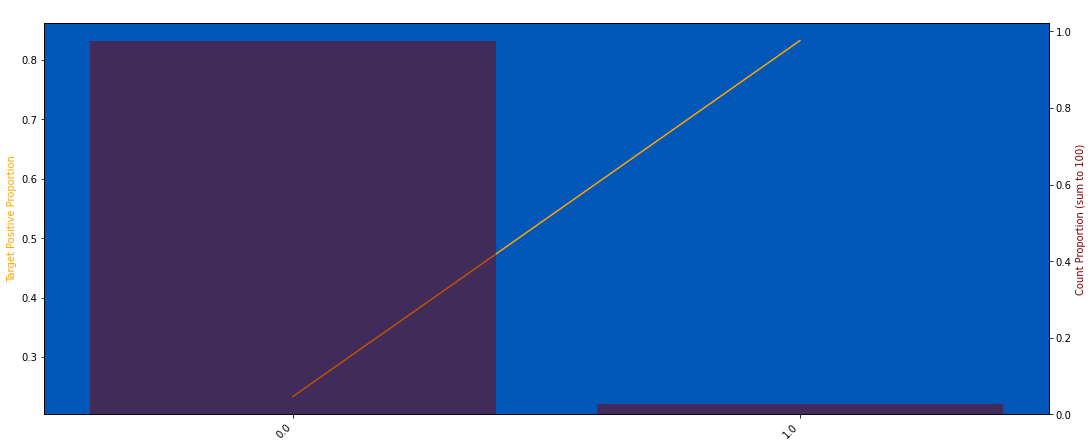

In [34]:
plot_target_check(train, "R_4", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

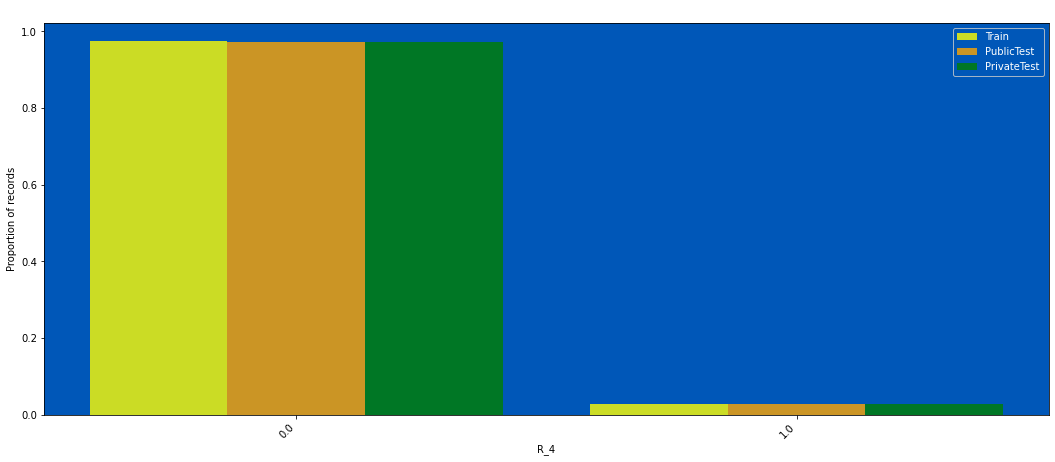

In [35]:
plot_train_test_distribution(df_list, "R_4", nunique_thr=100, without_drop_tail=True)

### R_5

In [36]:
# plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=2)

In [37]:
%%time
df_list = round_dfs(df_list, col="R_5", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 276 ms, sys: 937 ms, total: 1.21 s
Wall time: 2.12 s


In [38]:
# plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

In [39]:
for df in df_list:
    df["R_5"] *= 2
    df["R_5"] = np.where(df["R_5"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


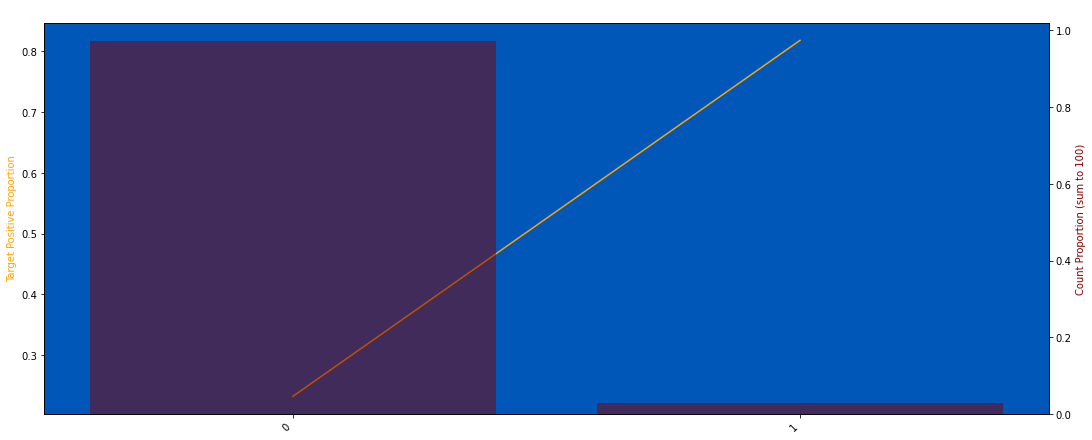

In [40]:
plot_target_check(train, "R_5", q=50, use_raw_bin=True, nunique_thr=15000, strfy_x=True, without_drop_tail=True)

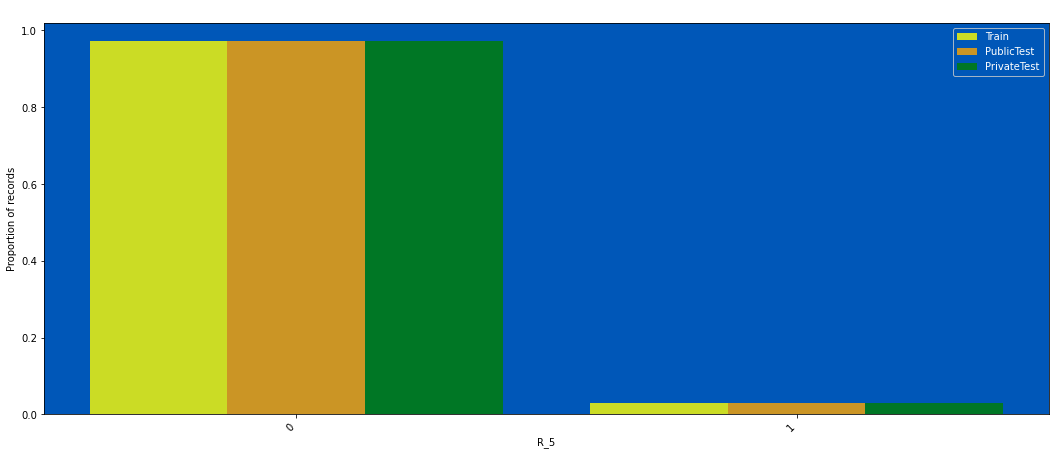

In [41]:
plot_train_test_distribution(df_list, "R_5", nunique_thr=100, without_drop_tail=True)

### R_6

In [42]:
# plot_target_check(train, "R_6", q=50, use_raw_bin=True)

In [43]:
%%time
df_list = round_dfs(df_list, col="R_6", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 275 ms, sys: 985 ms, total: 1.26 s
Wall time: 2.15 s


In [44]:
for df in df_list:
    df["R_6"] = np.where(df["R_6"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Top & Bottom 1% are dropped from this chart


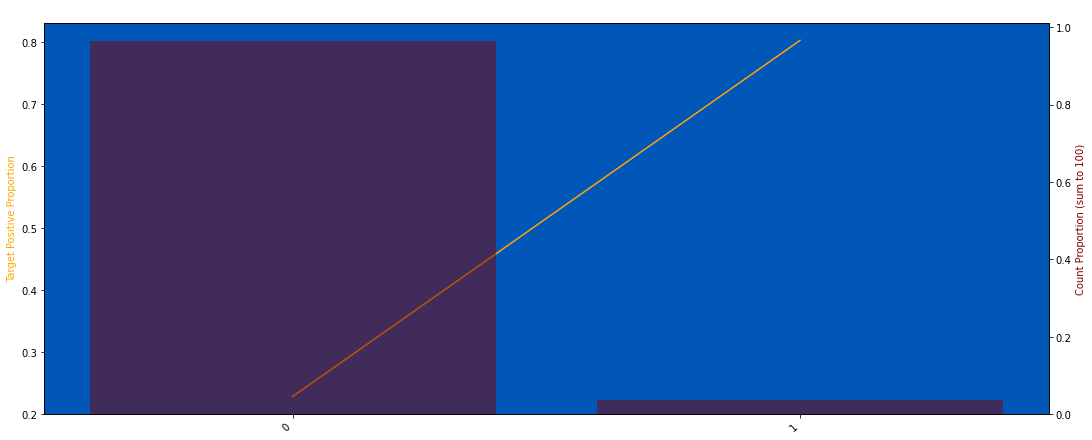

In [45]:
plot_target_check(train, "R_6", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


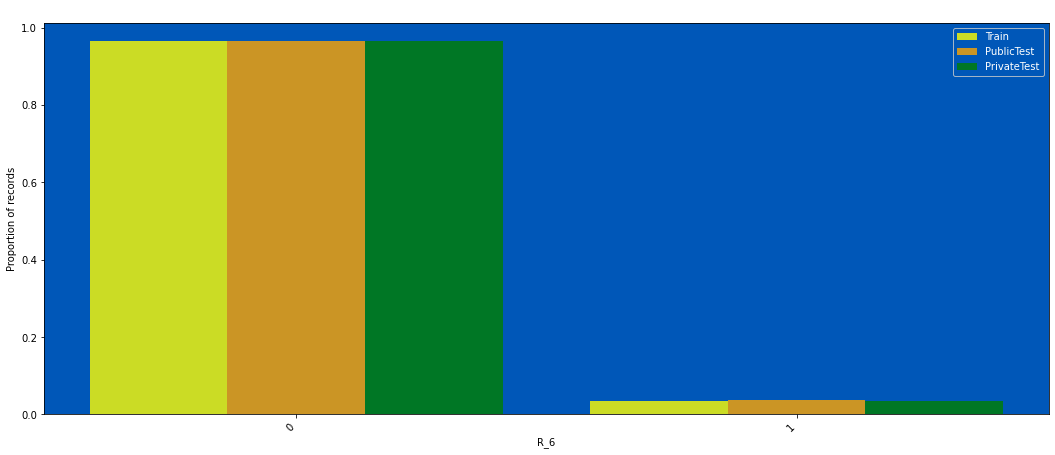

In [46]:
plot_train_test_distribution(df_list, "R_6", nunique_thr=5000)

### R_7

In [47]:
# plot_target_check(train, "R_7", q=50, use_raw_bin=True, nunique_thr=200, strfy_x=True)

In [48]:
%%time
df_list = round_dfs(df_list, col="R_7", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 264 ms, sys: 968 ms, total: 1.23 s
Wall time: 2.12 s


In [49]:
for df in df_list:
    df["R_7"] = np.where(df["R_7"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Top & Bottom 1% are dropped from this chart


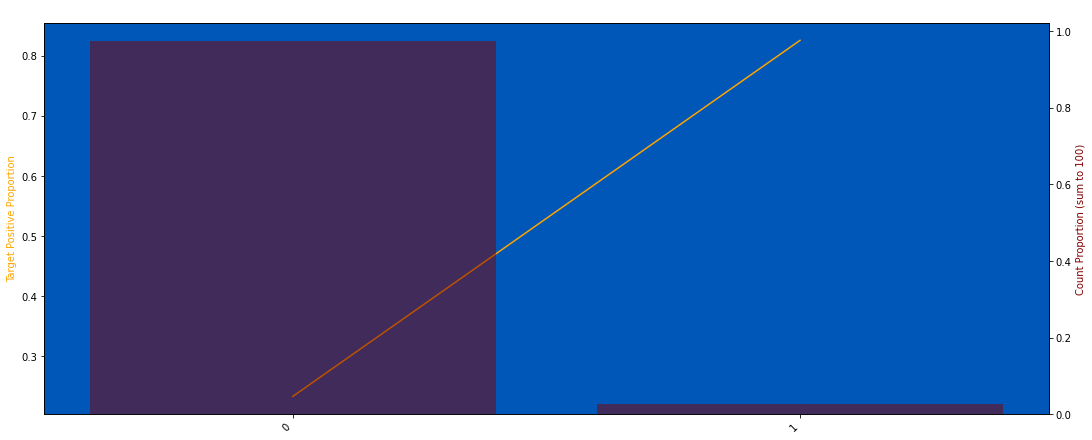

In [50]:
plot_target_check(train, "R_7", q=50, use_raw_bin=True, nunique_thr=20000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


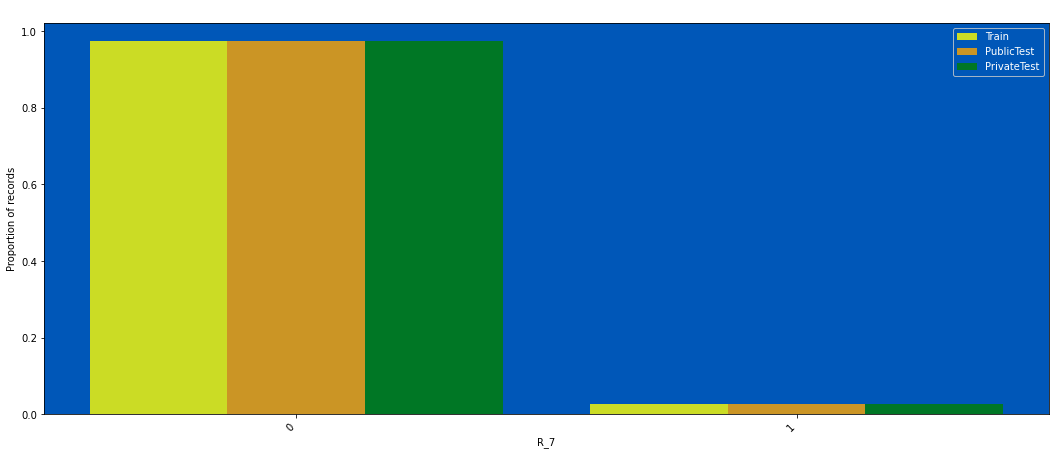

In [51]:
plot_train_test_distribution(df_list, "R_7", nunique_thr=20000)

### R_8

In [52]:
# plot_target_check(train, "R_8", q=50, use_raw_bin=True)

In [53]:
%%time
df_list = round_dfs(df_list, col="R_8", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 982 ms, total: 1.24 s
Wall time: 2.14 s


In [54]:
for df in df_list:
    df["R_8"] = np.where(df["R_8"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


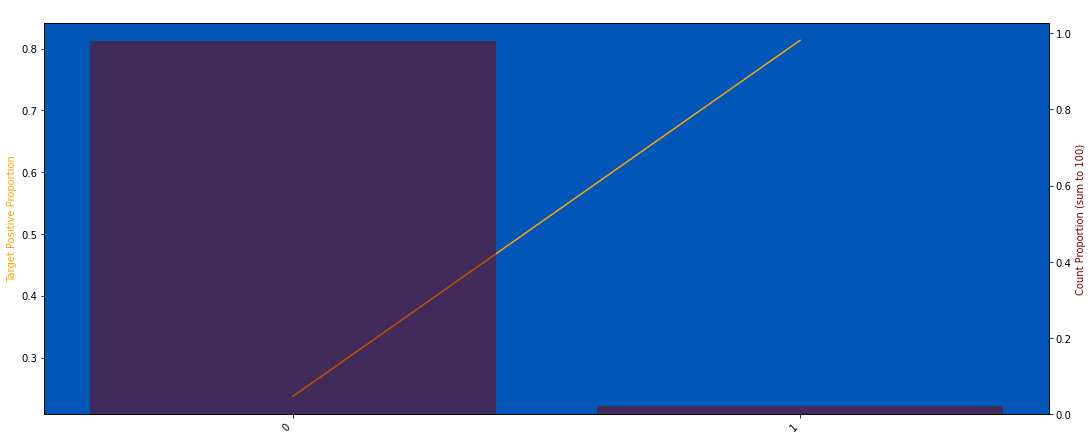

In [55]:
plot_target_check(train, "R_8", q=50, use_raw_bin=True, nunique_thr=30000, strfy_x=True, without_drop_tail=True)

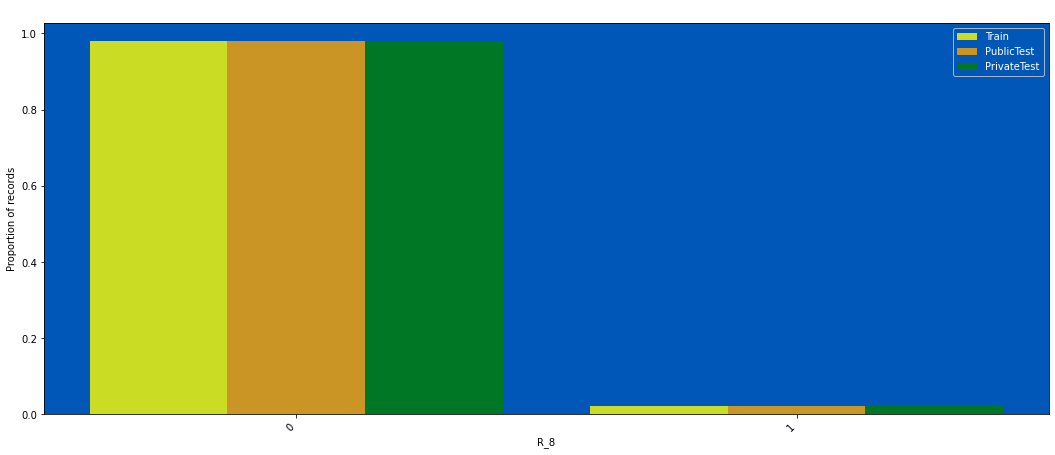

In [56]:
plot_train_test_distribution(df_list, "R_8", nunique_thr=100, without_drop_tail=True)

### R_9

In [57]:
# plot_target_check(train, "R_9", q=50, use_raw_bin=True)

In [58]:
%%time
df_list = round_dfs(df_list, col="R_9", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 254 ms, sys: 956 ms, total: 1.21 s
Wall time: 2.29 s


5218918 null count, 0.943 null proportion
0.2293 of the targets have label = 1


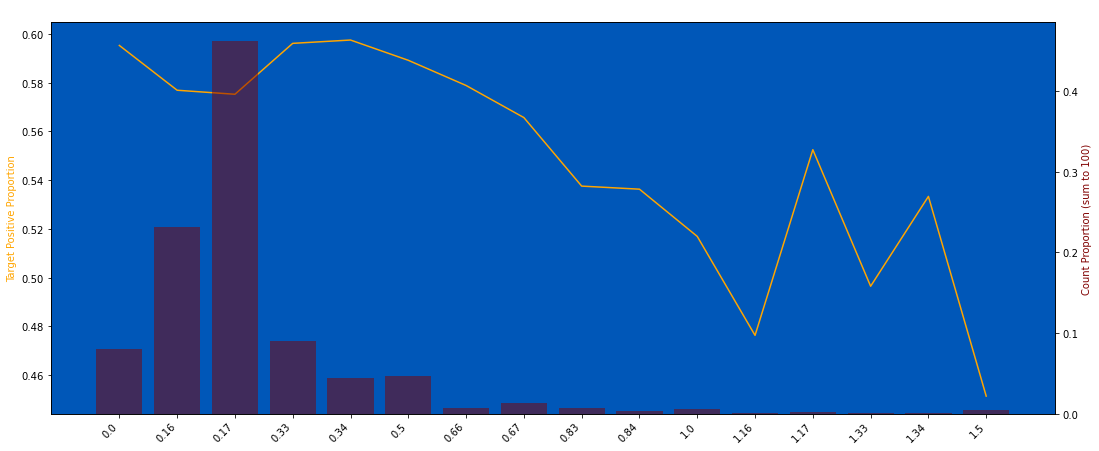

In [59]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [60]:
for df in df_list:
    df["R_9_"] = (df["R_9"] / 0.167).round(0)

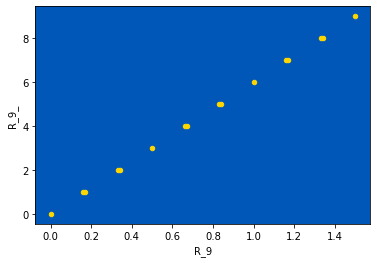

In [61]:
check_binning(train, "R_9", end=100000)

In [62]:
for df in df_list:
    df["R_9"] = (df["R_9"] / 0.167).round(0)

In [172]:
for df in df_list:
    df["R_9"] = df["R_9"].replace(0, 1)
    df["R_9"] = df["R_9"].fillna(15)
    df = df.drop(columns="R_9_", errors="ignore", inplace=True)

0 null count, 0.000 null proportion
nan of the targets have label = 1


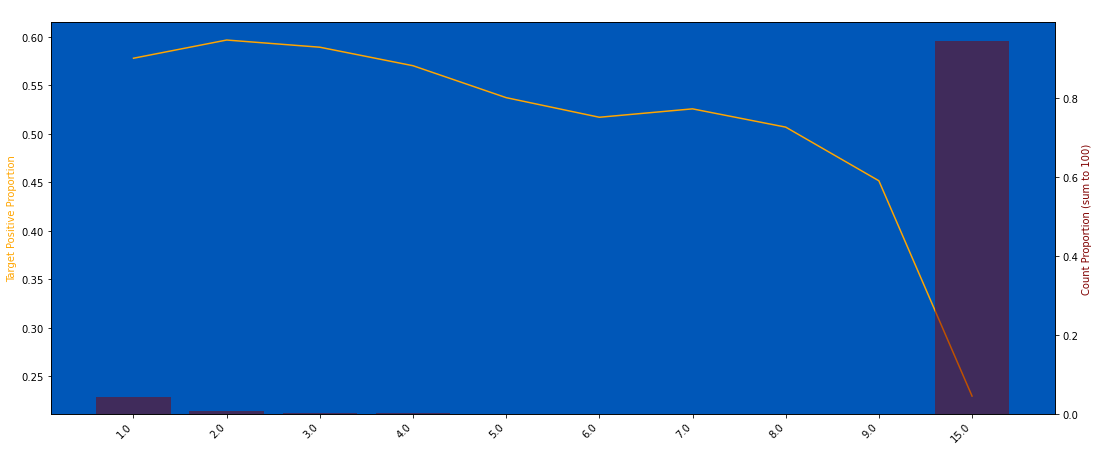

In [173]:
plot_target_check(train, "R_9", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

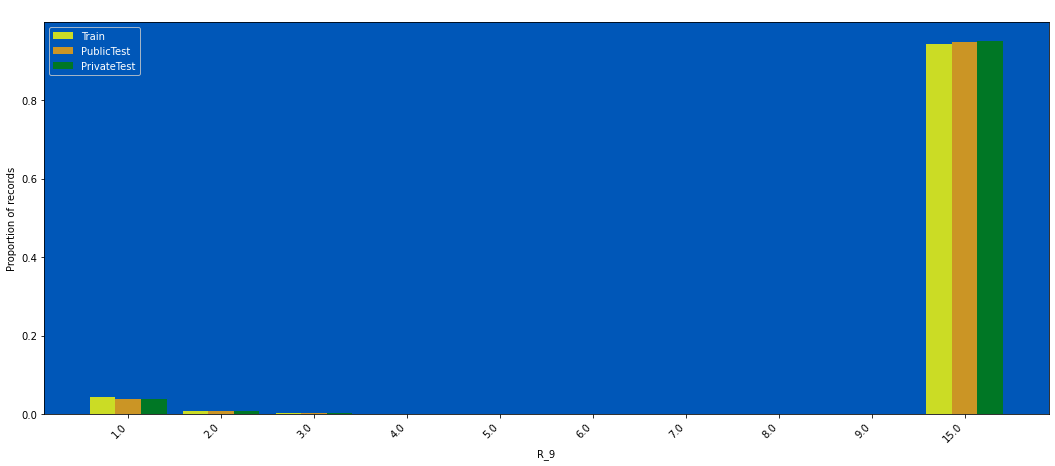

In [174]:
plot_train_test_distribution(df_list, "R_9", nunique_thr=100, without_drop_tail=True)

### R_10

In [65]:
# plot_target_check(train, "R_10", q=50, use_raw_bin=True)

In [66]:
%%time
df_list = round_dfs(df_list, col="R_10", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 261 ms, sys: 971 ms, total: 1.23 s
Wall time: 2.14 s


In [67]:
for df in df_list:
    df["R_10"] = np.where(df["R_10"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


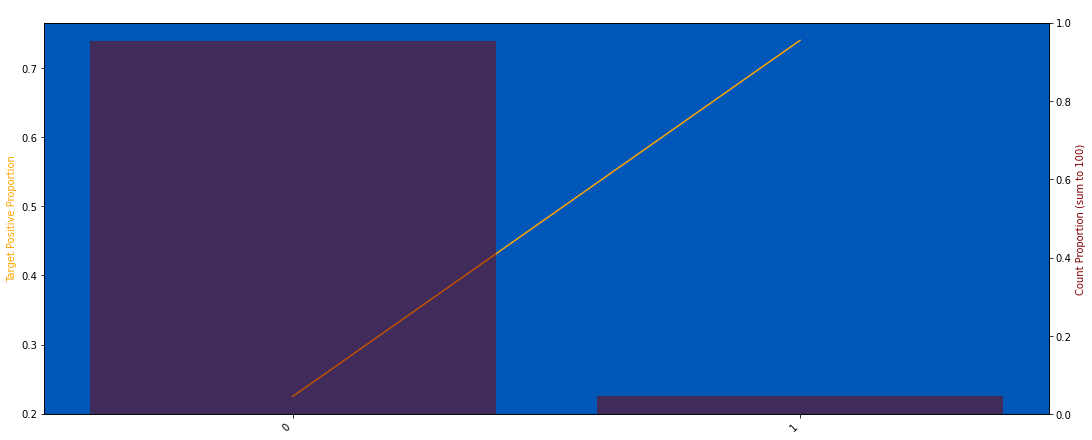

In [68]:
plot_target_check(train, "R_10", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

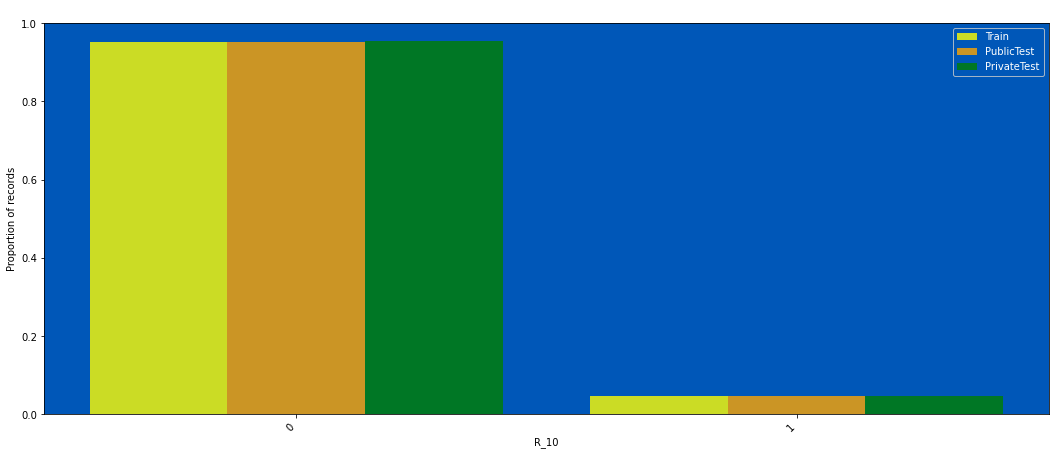

In [69]:
plot_train_test_distribution(df_list, "R_10", nunique_thr=100, without_drop_tail=True)

### R_11

In [70]:
# plot_target_check(train, "R_11", q=50, use_raw_bin=True)

In [71]:
%%time
df_list = round_dfs(df_list, col="R_11", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 249 ms, sys: 949 ms, total: 1.2 s
Wall time: 2.11 s


In [72]:
for df in df_list:
    df["R_11_"] = (df["R_11"] * 2).round(0)

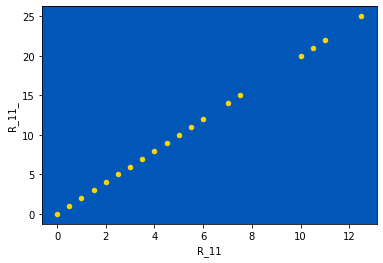

In [73]:
check_binning(train, "R_11", end=200000)

In [74]:
for df in df_list:
    df["R_11"] = (df["R_11"] * 2).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


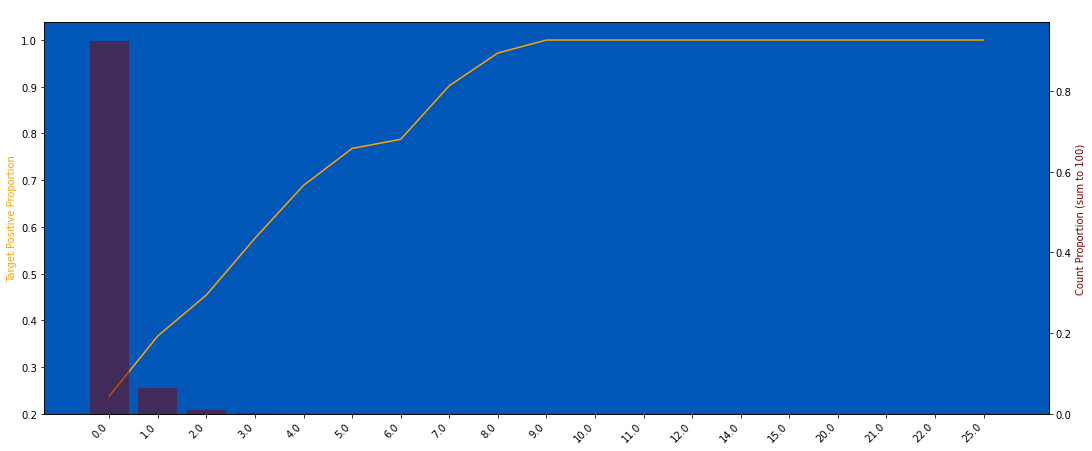

In [75]:
plot_target_check(train, "R_11", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

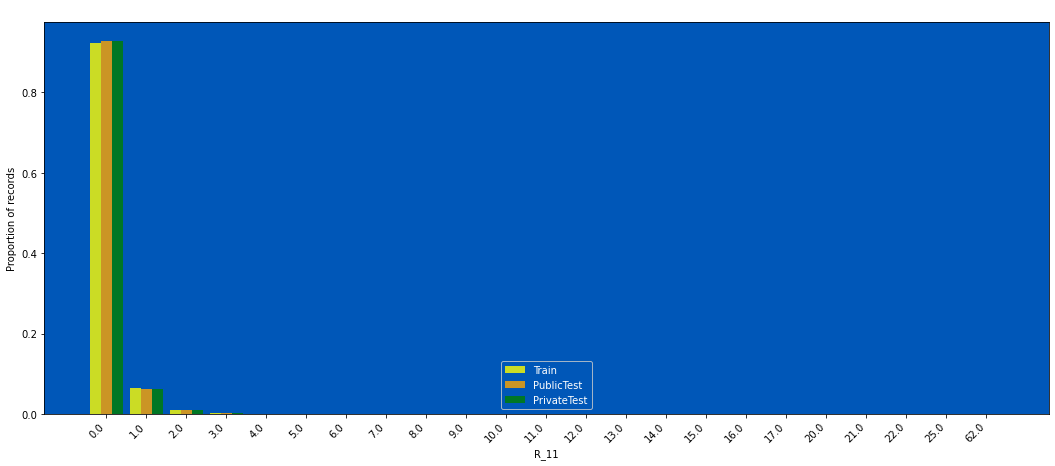

In [76]:
plot_train_test_distribution(df_list, "R_11", nunique_thr=100, without_drop_tail=True)

### R_12

In [77]:
# plot_target_check(train, "R_12", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1000)

In [78]:
%%time
df_list = round_dfs(df_list, col="R_12", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 247 ms, sys: 979 ms, total: 1.23 s
Wall time: 2.12 s


In [79]:
for df in df_list:
    df["R_12"] = np.where(df["R_12"] < 1, 0, 1)

0 null count, 0.000 null proportion
nan of the targets have label = 1


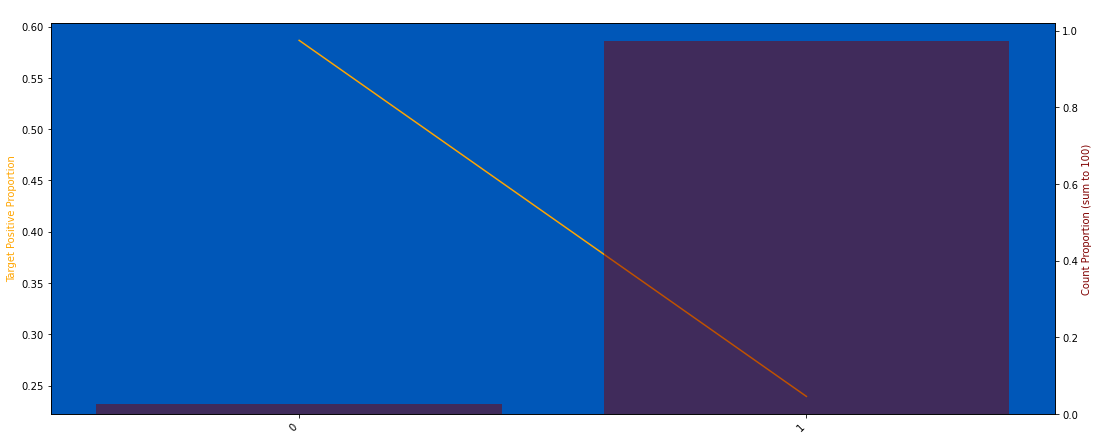

In [80]:
plot_target_check(train, "R_12", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=1000, without_drop_tail=True)

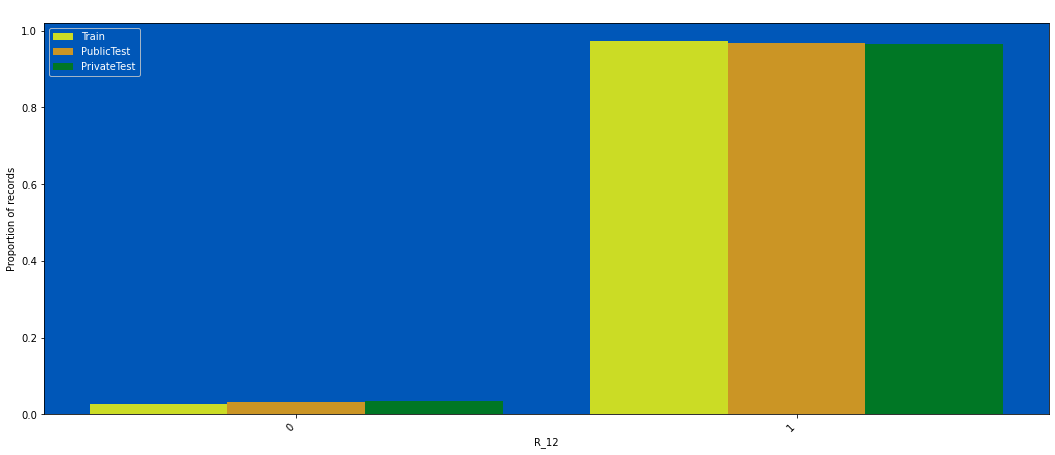

In [81]:
plot_train_test_distribution(df_list, "R_12", nunique_thr=100, without_drop_tail=True)

### R_13

In [82]:
# plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=29, strfy_x=True)

In [83]:
%%time
df_list = round_dfs(df_list, col="R_13", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 243 ms, sys: 959 ms, total: 1.2 s
Wall time: 2.09 s


In [84]:
for df in df_list:
    df["R_13"] = np.where(df["R_13"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


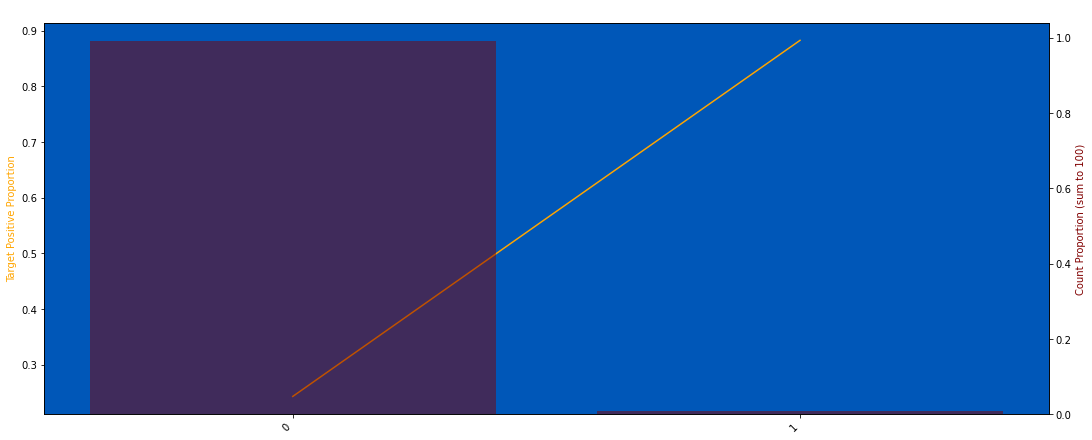

In [85]:
plot_target_check(train, "R_13", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

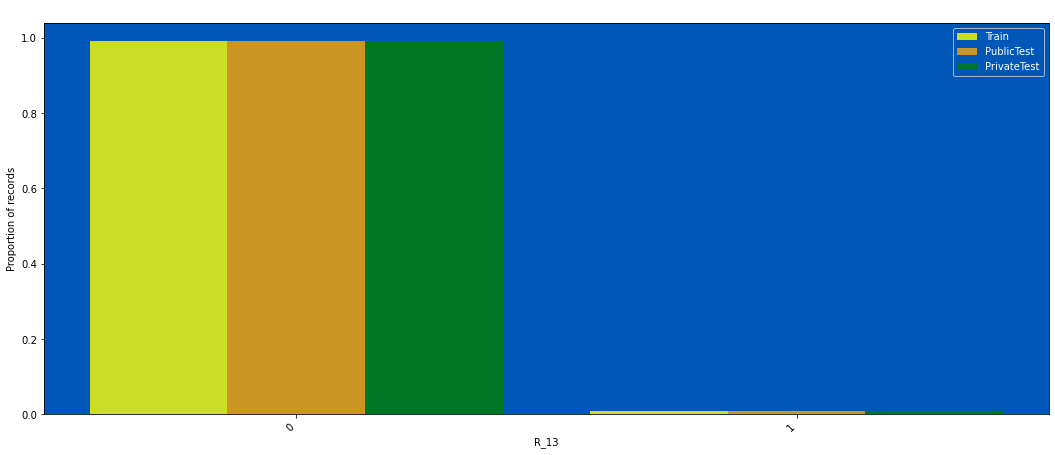

In [86]:
plot_train_test_distribution(df_list, "R_13", nunique_thr=100, without_drop_tail=True)

### R_14

In [87]:
# plot_target_check(train, "R_14", q=50, use_raw_bin=True)

In [88]:
%%time
df_list = round_dfs(df_list, col="R_14", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 254 ms, sys: 1.04 s, total: 1.29 s
Wall time: 2.1 s


In [89]:
for df in df_list:
    df["R_14"] = np.where(df["R_14"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Top & Bottom 1% are dropped from this chart


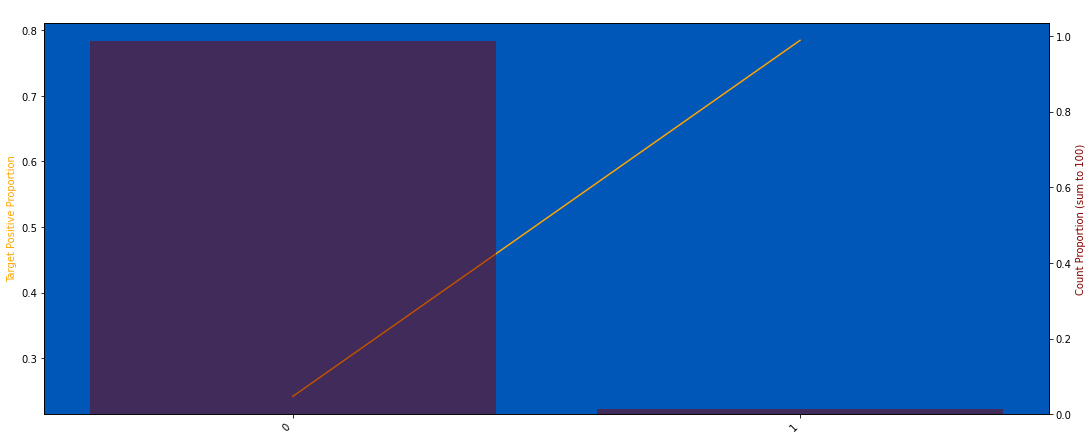

In [90]:
plot_target_check(train, "R_14", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

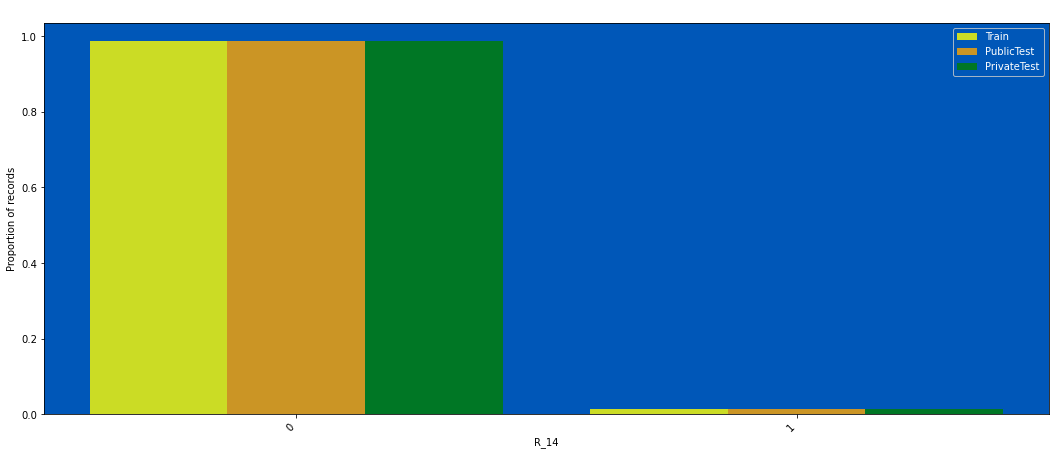

In [91]:
plot_train_test_distribution(df_list, "R_14", nunique_thr=50000, without_drop_tail=True)

### R_15

In [92]:
# plot_target_check(train, "R_15", q=50, use_raw_bin=True)

In [93]:
%%time
df_list = round_dfs(df_list, col="R_15", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 228 ms, sys: 939 ms, total: 1.17 s
Wall time: 2.06 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


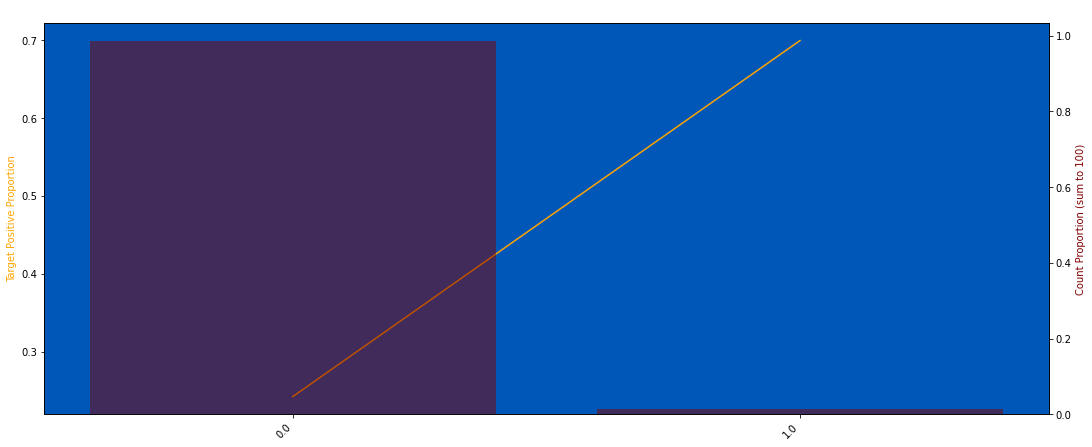

In [94]:
plot_target_check(train, "R_15", q=50, use_raw_bin=True, nunique_thr=5, strfy_x=True)

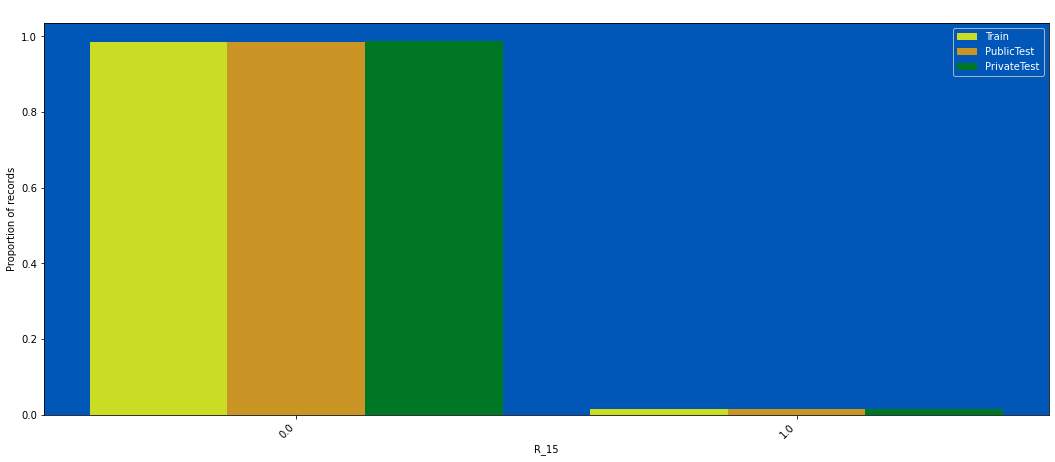

In [95]:
plot_train_test_distribution(df_list, "R_15", nunique_thr=50000, without_drop_tail=True)

### R_16

In [96]:
# plot_target_check(train, "R_16", q=50, use_raw_bin=True)

In [97]:
%%time
df_list = round_dfs(df_list, col="R_16", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 230 ms, sys: 957 ms, total: 1.19 s
Wall time: 2.09 s


In [98]:
for df in df_list:
    df["R_16"] *= 2

0 null count, 0.000 null proportion
nan of the targets have label = 1


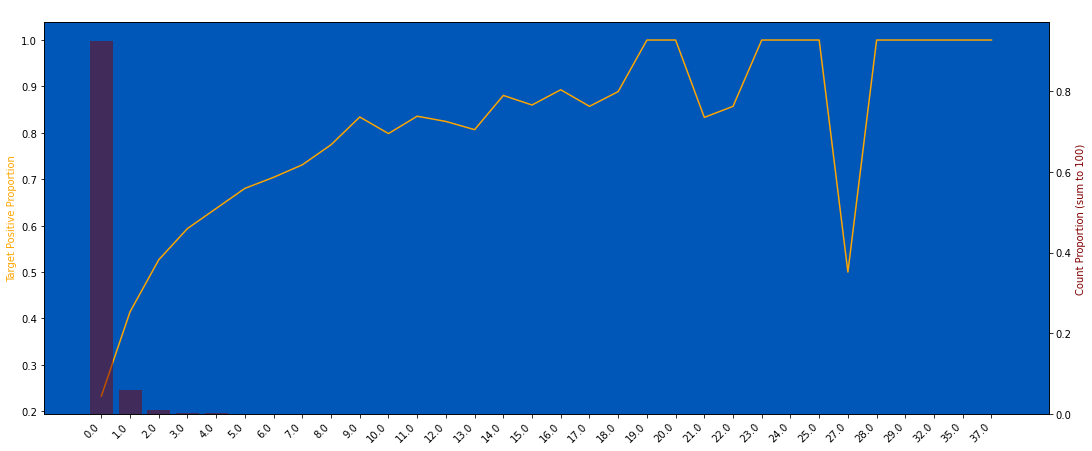

In [99]:
plot_target_check(train, "R_16", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

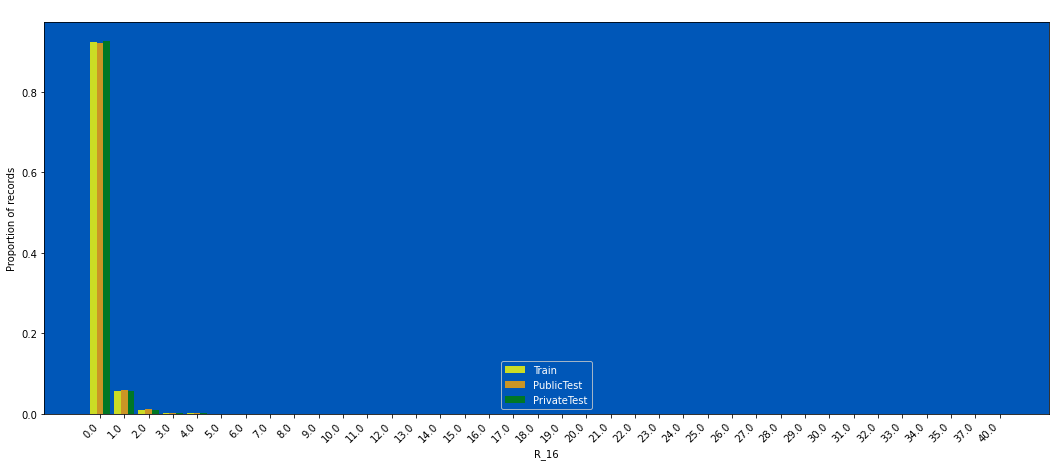

In [100]:
plot_train_test_distribution(df_list, "R_16", nunique_thr=50000, without_drop_tail=True)

### R_17

In [101]:
# plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=26)

In [102]:
%%time
df_list = round_dfs(df_list, col="R_17", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 224 ms, sys: 1 s, total: 1.23 s
Wall time: 2.12 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


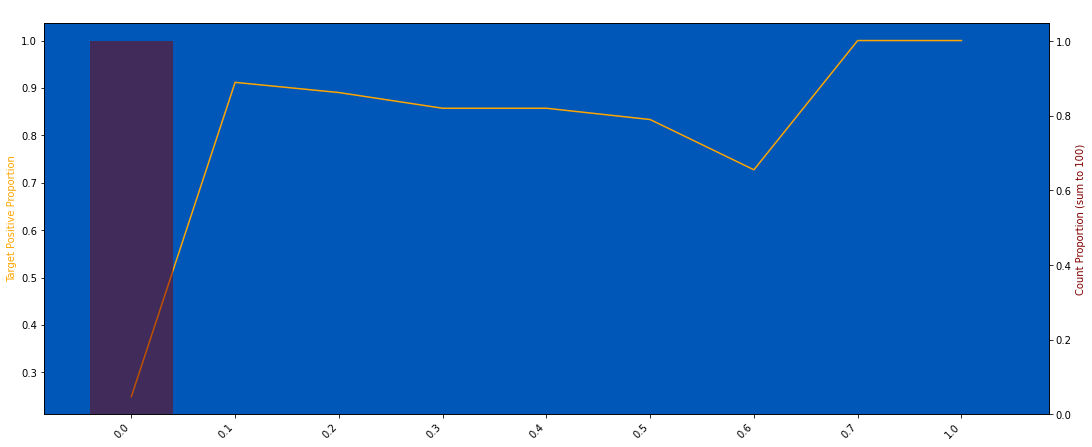

In [103]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

In [104]:
for df in df_list:
    df["R_17"] = np.where(df["R_17"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


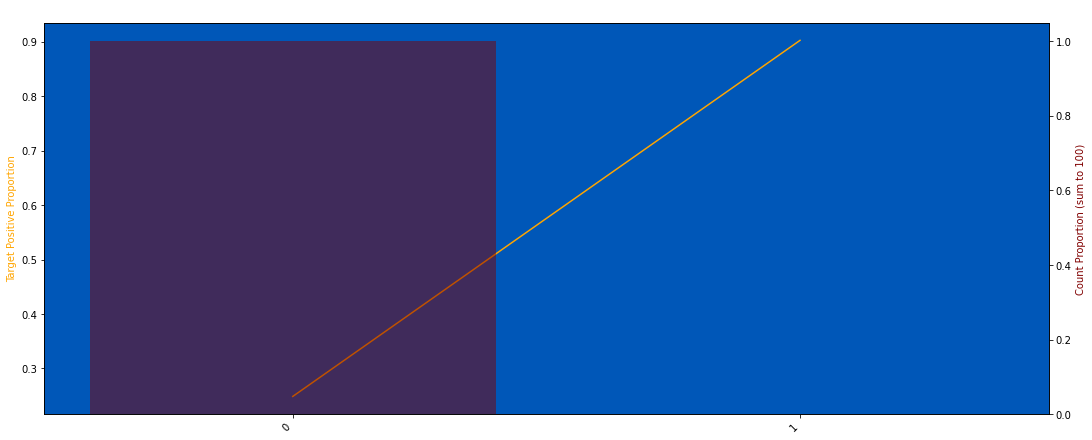

In [105]:
plot_target_check(train, "R_17", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

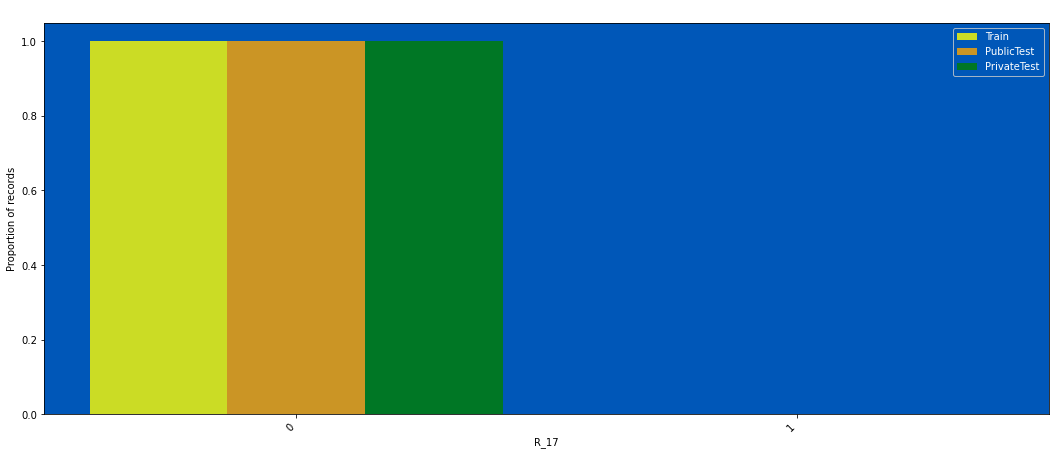

In [106]:
plot_train_test_distribution(df_list, "R_17", nunique_thr=50000, without_drop_tail=True)

### R_18

In [107]:
# plot_target_check(train, "R_18", q=50, use_raw_bin=True)

In [108]:
%%time
df_list = round_dfs(df_list, col="R_18", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 220 ms, sys: 972 ms, total: 1.19 s
Wall time: 2.08 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


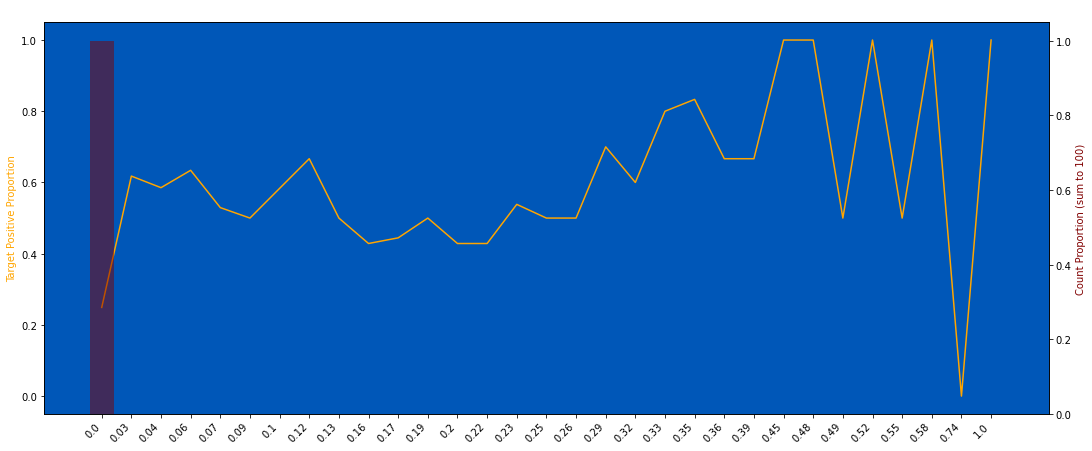

In [109]:
plot_target_check(train, "R_18", q=50, use_raw_bin=True, strfy_x=True, nunique_thr=300, without_drop_tail=True)

In [110]:
for df in df_list:
    df["R_18"] = np.where(df["R_18"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


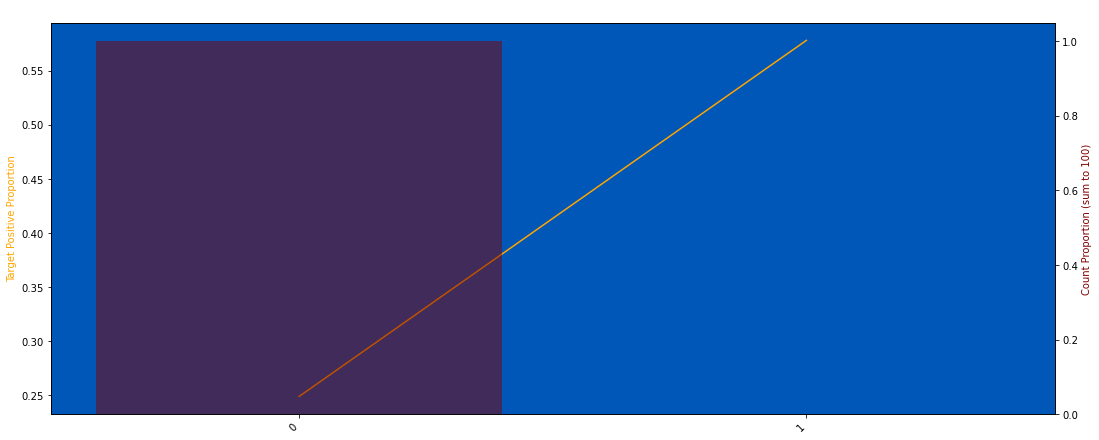

In [111]:
plot_target_check(train, "R_18", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

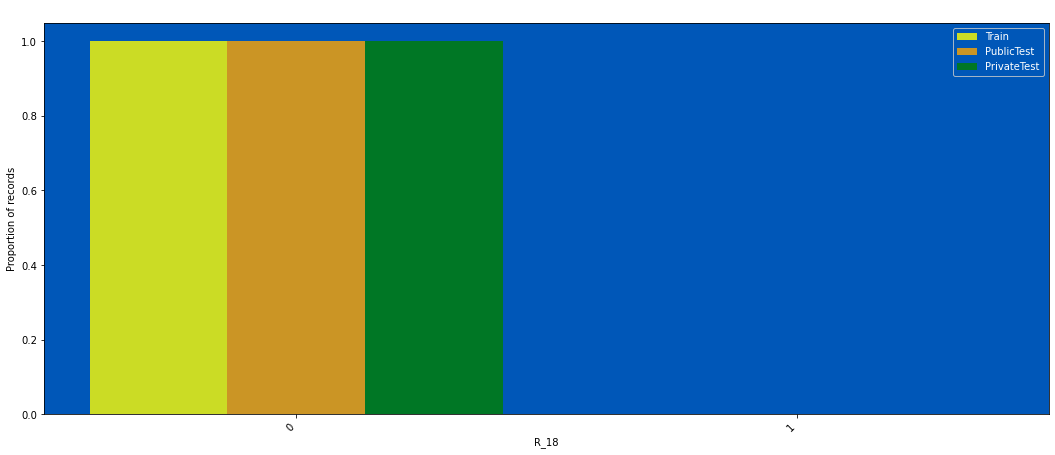

In [112]:
plot_train_test_distribution(df_list, "R_18", nunique_thr=50000, without_drop_tail=True)

### R_19

In [113]:
# plot_target_check(train, "R_19", q=50, use_raw_bin=True, nunique_thr=20)

In [114]:
%%time
df_list = round_dfs(df_list, col="R_19", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 214 ms, sys: 967 ms, total: 1.18 s
Wall time: 2.08 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


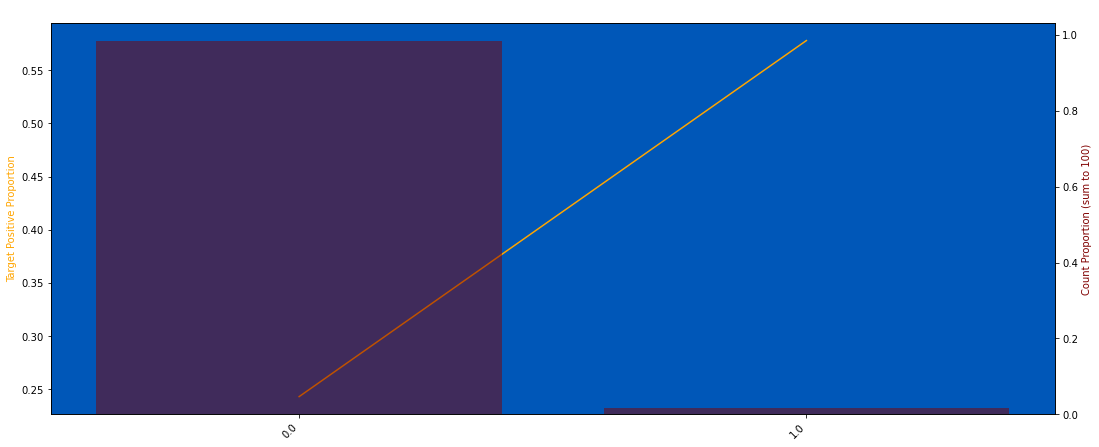

In [115]:
plot_target_check(train, "R_19", q=50, use_raw_bin=True, nunique_thr=4, strfy_x=True, without_drop_tail=True)

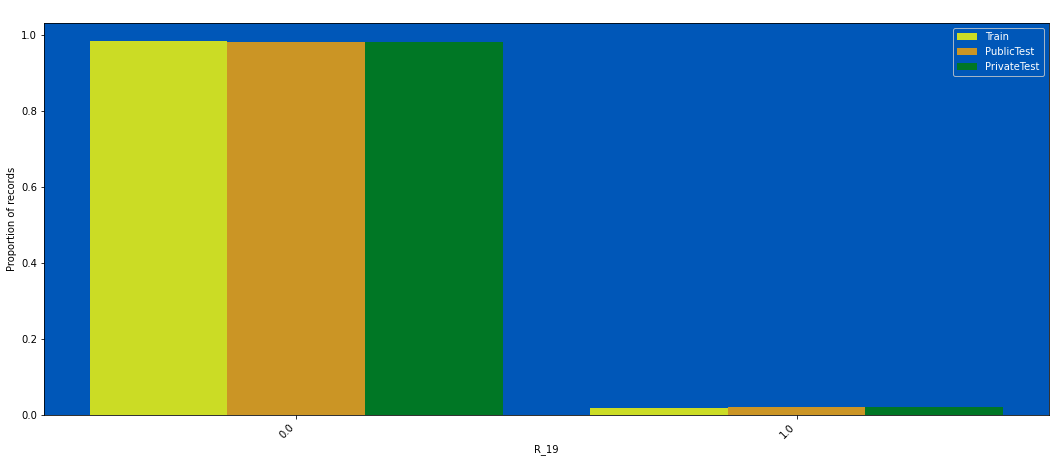

In [116]:
plot_train_test_distribution(df_list, "R_19", nunique_thr=500, without_drop_tail=True)

### R_20

In [117]:
# plot_target_check(train, "R_20", q=50, use_raw_bin=True)

In [118]:
%%time
df_list = round_dfs(df_list, col="R_20", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 213 ms, sys: 989 ms, total: 1.2 s
Wall time: 2.12 s


In [119]:
for df in df_list:
    df["R_20"] = np.where(df["R_20"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


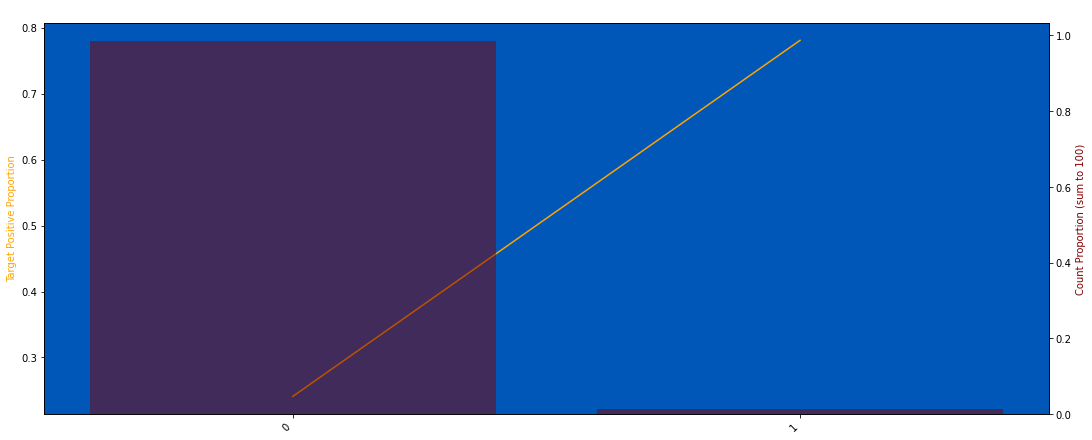

In [120]:
plot_target_check(train, "R_20", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

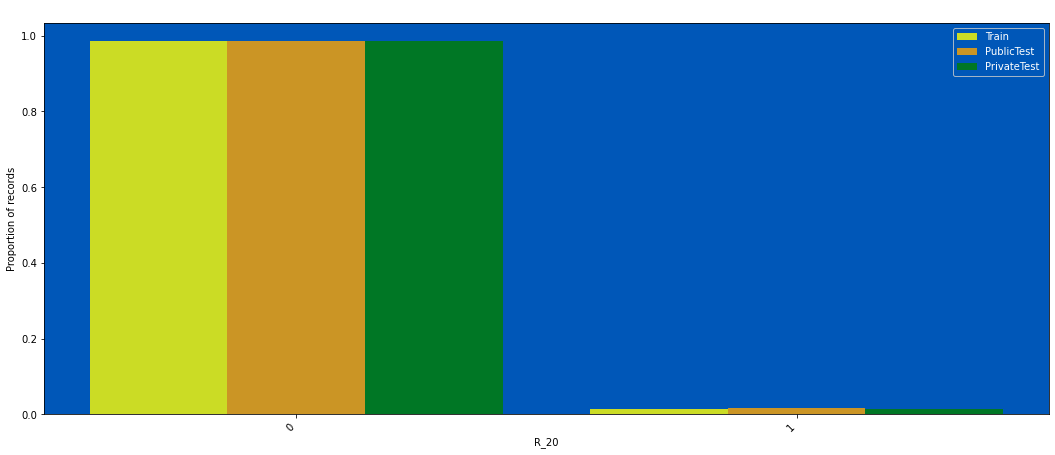

In [121]:
plot_train_test_distribution(df_list, "R_20", nunique_thr=500, without_drop_tail=True)

### R_21

In [122]:
# plot_target_check(train, "R_21", q=50, use_raw_bin=True)

In [123]:
%%time
df_list = round_dfs(df_list, col="R_21", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 225 ms, sys: 1.01 s, total: 1.23 s
Wall time: 2.16 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


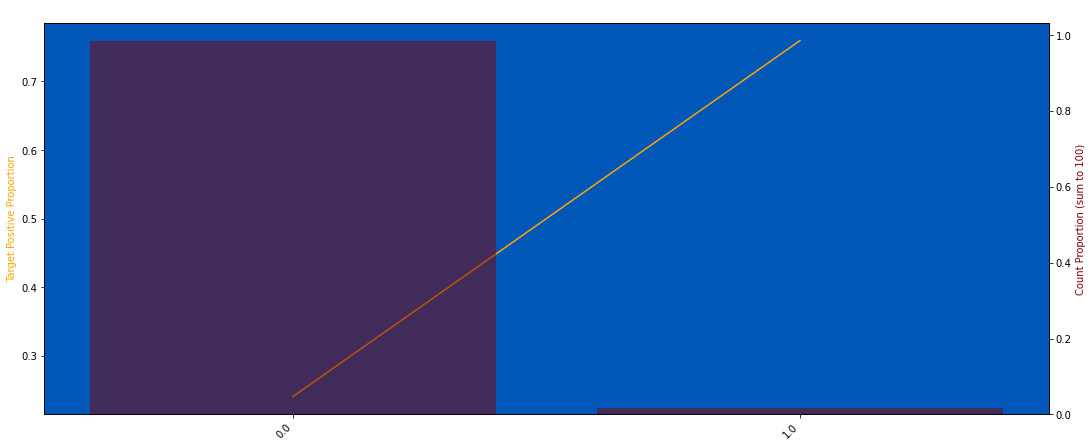

In [124]:
plot_target_check(train, "R_21", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

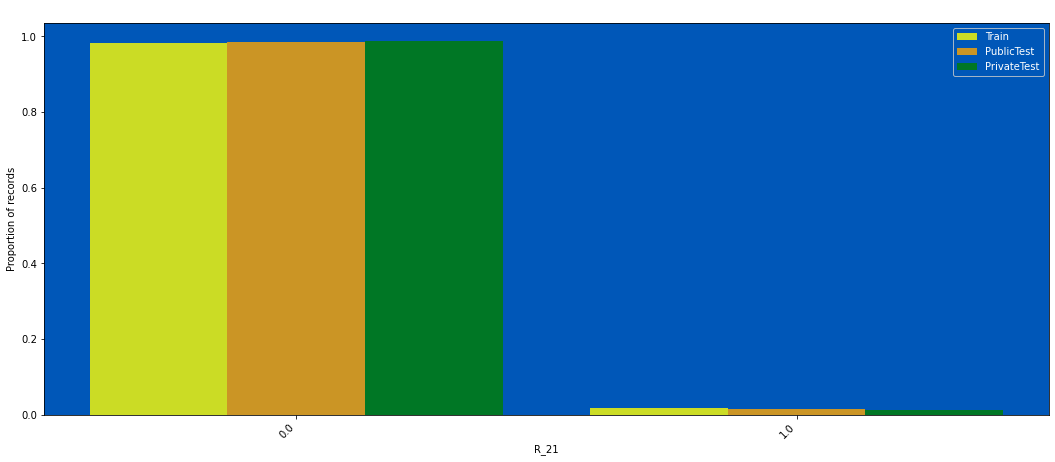

In [125]:
plot_train_test_distribution(df_list, "R_21", nunique_thr=500, without_drop_tail=True)

### R_22

In [126]:
# plot_target_check(train, "R_22", q=50, use_raw_bin=True)

In [127]:
%%time
df_list = round_dfs(df_list, col="R_22", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 213 ms, sys: 979 ms, total: 1.19 s
Wall time: 2.1 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


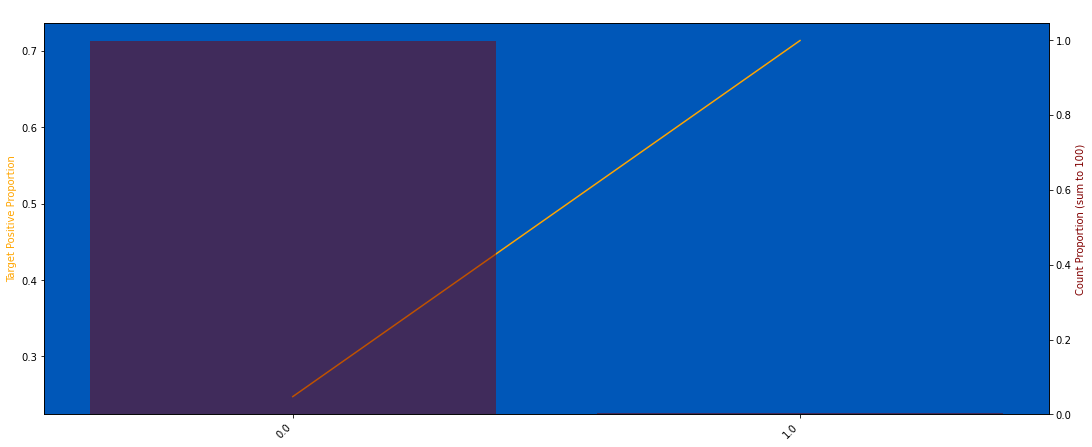

In [128]:
plot_target_check(train, "R_22", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

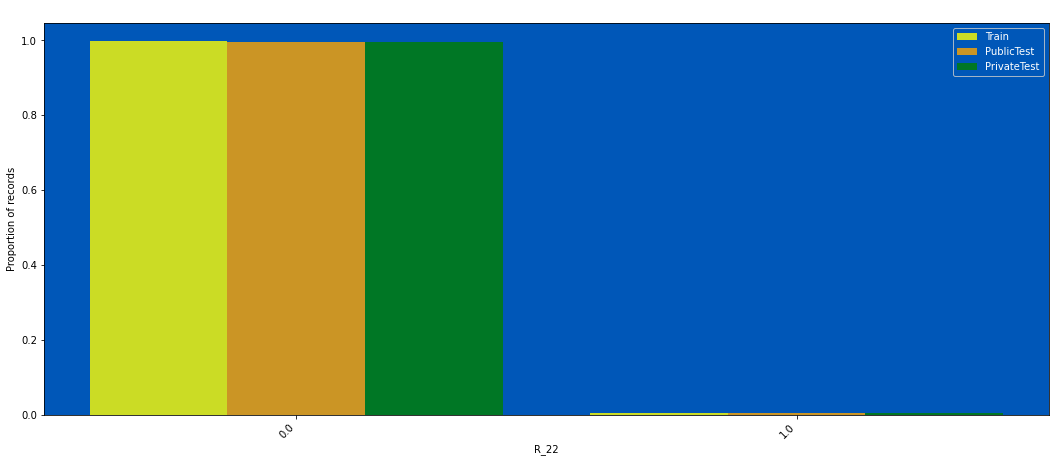

In [129]:
plot_train_test_distribution(df_list, "R_22", nunique_thr=500, without_drop_tail=True)

### R_23

In [130]:
# plot_target_check(train, "R_23", q=50, use_raw_bin=True)

In [131]:
%%time
df_list = round_dfs(df_list, col="R_23", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 204 ms, sys: 946 ms, total: 1.15 s
Wall time: 2.04 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


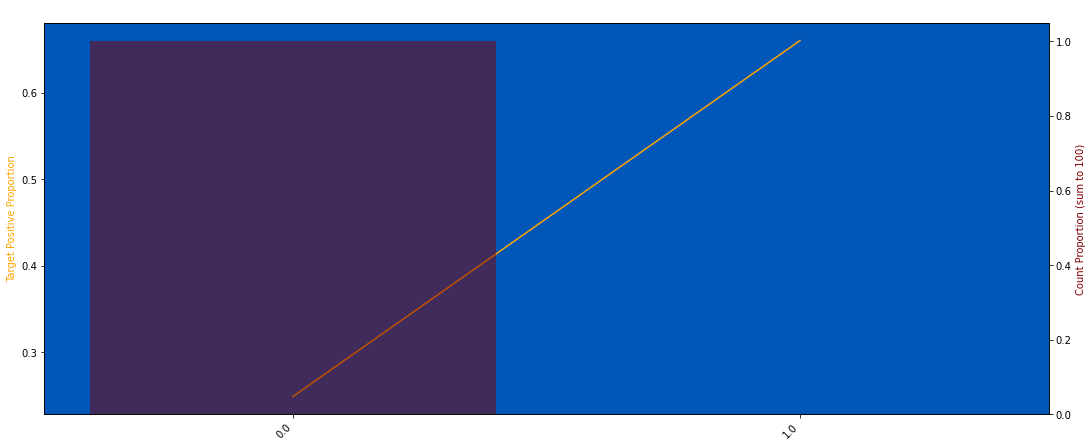

In [132]:
plot_target_check(train, "R_23", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

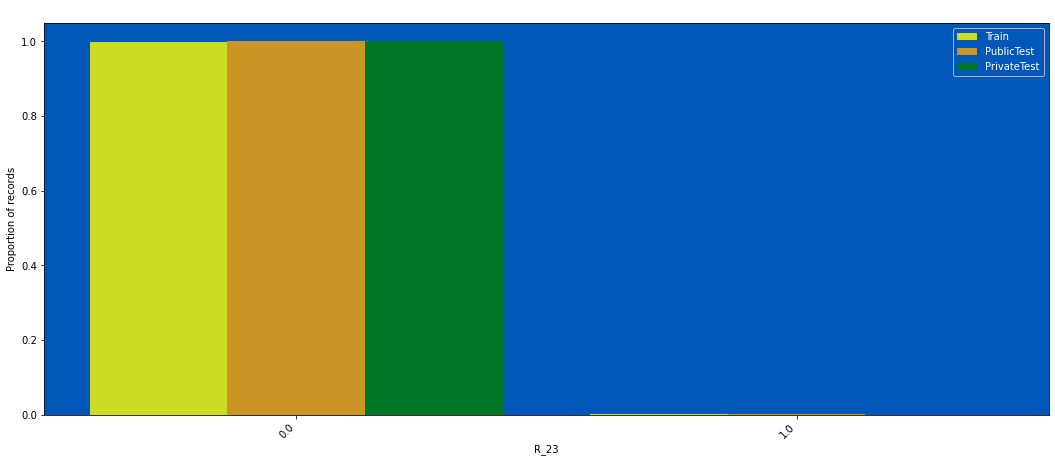

In [133]:
plot_train_test_distribution(df_list, "R_23", nunique_thr=500, without_drop_tail=True)

### R_24

In [134]:
# plot_target_check(train, "R_24", q=50, use_raw_bin=True)

In [135]:
%%time
df_list = round_dfs(df_list, col="R_24", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 202 ms, sys: 950 ms, total: 1.15 s
Wall time: 2.14 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


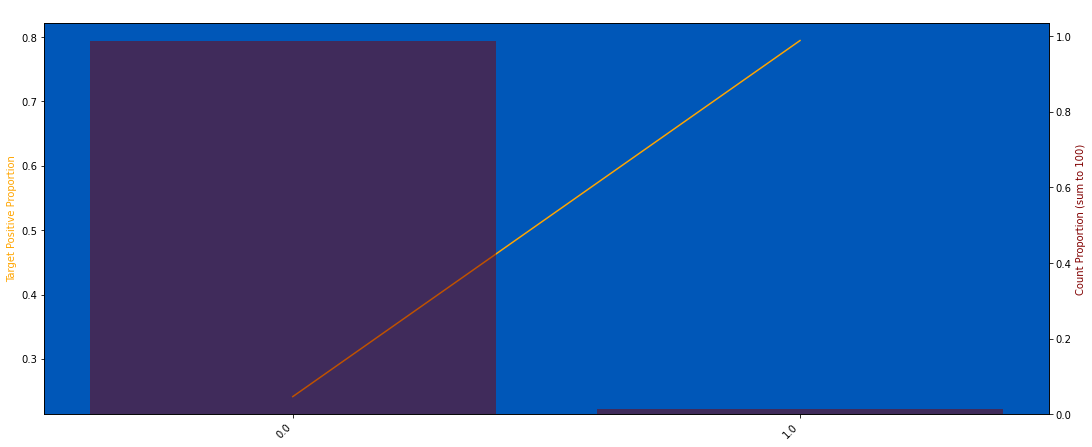

In [136]:
plot_target_check(train, "R_24", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

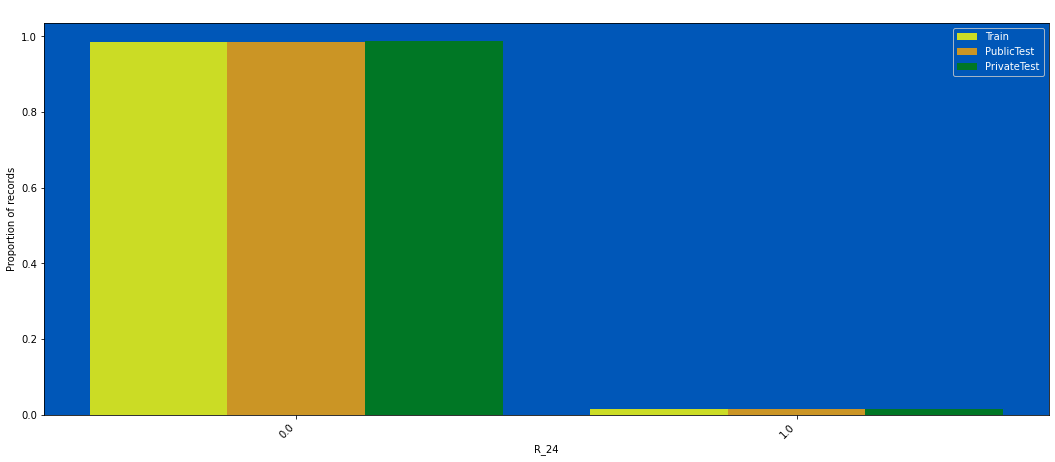

In [137]:
plot_train_test_distribution(df_list, "R_24", nunique_thr=500, without_drop_tail=True)

### R_25

In [138]:
# plot_target_check(train, "R_25", q=50, use_raw_bin=True)

In [139]:
%%time
df_list = round_dfs(df_list, col="R_25", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 196 ms, sys: 960 ms, total: 1.16 s
Wall time: 2.08 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


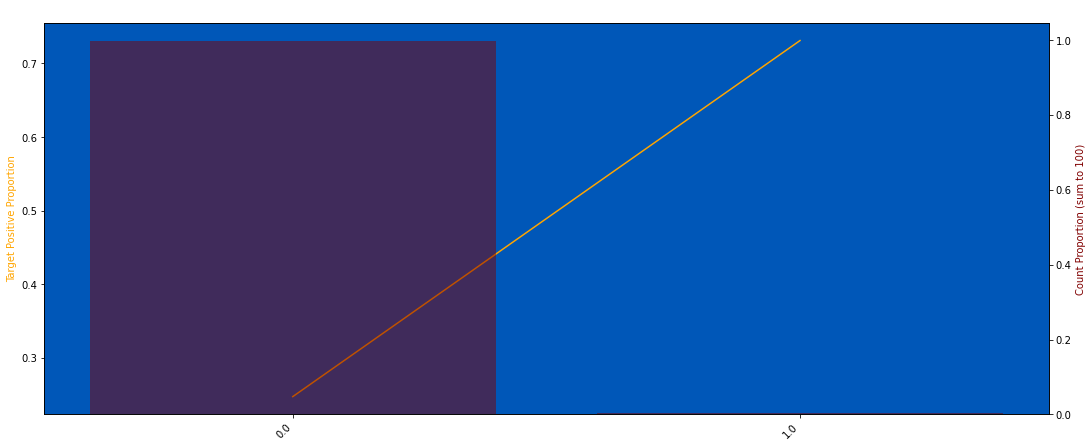

In [140]:
plot_target_check(train, "R_25", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

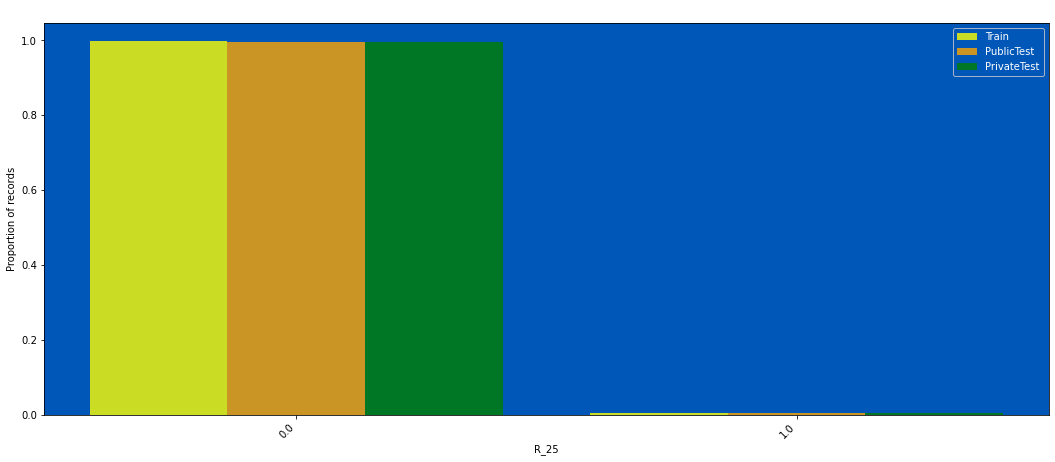

In [141]:
plot_train_test_distribution(df_list, "R_25", nunique_thr=500, without_drop_tail=True)

### R_26

In [142]:
# plot_target_check(train, "R_26", q=50, use_raw_bin=True)

In [143]:
%%time
df_list = round_dfs(df_list, col="R_26", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 195 ms, sys: 954 ms, total: 1.15 s
Wall time: 2.25 s


In [144]:
for df in df_list:
    df["R_26"] = np.where(df["R_26"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Top & Bottom 1% are dropped from this chart


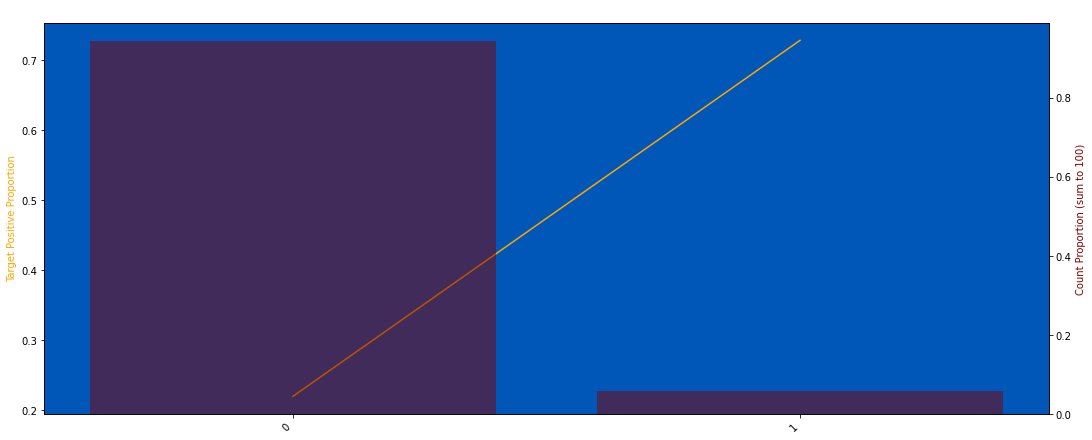

In [145]:
plot_target_check(train, "R_26", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


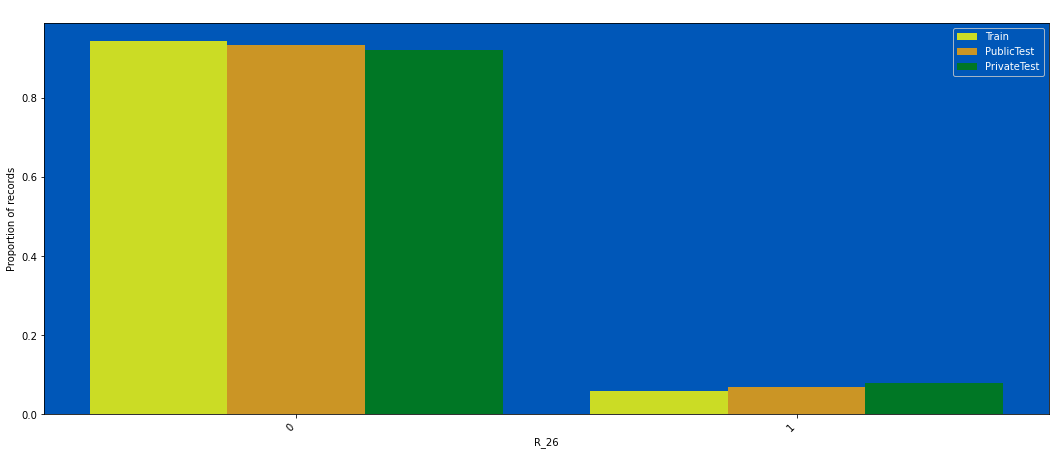

In [146]:
plot_train_test_distribution(df_list, "R_26", nunique_thr=5000)

### R_27

In [147]:
# plot_target_check(train, "R_27", q=50, use_raw_bin=True, strfy_x=True)

In [148]:
%%time
df_list = round_dfs(df_list, col="R_27", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 184 ms, sys: 854 ms, total: 1.04 s
Wall time: 1.93 s


In [149]:
for df in df_list:
    df["R_27"] = np.where(df["R_27"] >= 0.9, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


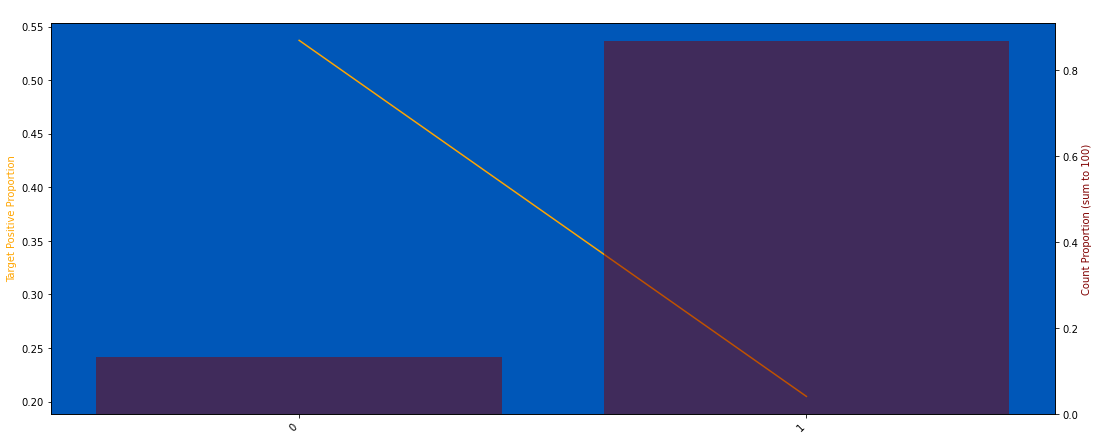

In [150]:
plot_target_check(train, "R_27", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

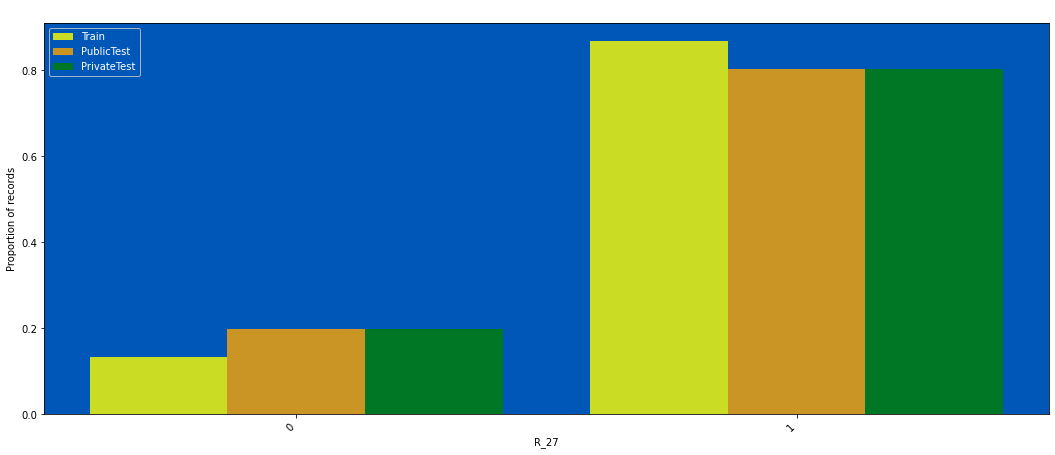

In [151]:
plot_train_test_distribution(df_list, "R_27", nunique_thr=5000, without_drop_tail=True)

### R_28

In [153]:
# plot_target_check(train, "R_28", q=50, use_raw_bin=True)

In [154]:
%%time
df_list = round_dfs(df_list, col="R_28", decimals=1, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 169 ms, sys: 913 ms, total: 1.08 s
Wall time: 2.13 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


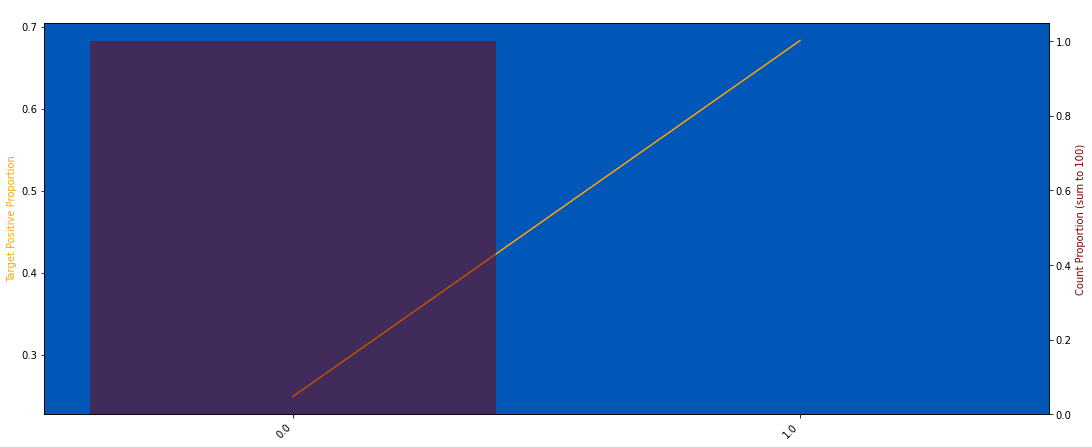

In [155]:
plot_target_check(train, "R_28", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

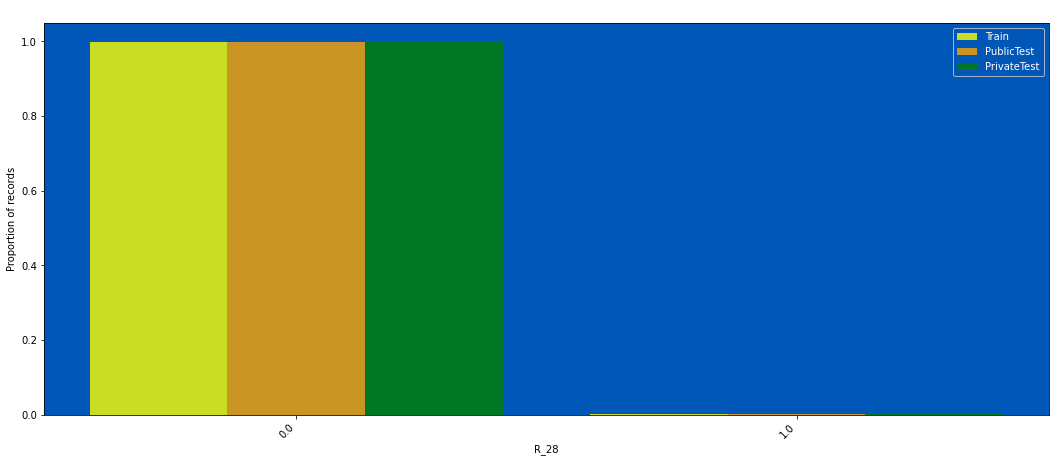

In [156]:
plot_train_test_distribution(df_list, "R_28", nunique_thr=5000, without_drop_tail=True)

### Column checking

In [176]:
all_columns = get_cols(df_list[0], ["R_"])
print(all_columns)

['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28']


In [177]:
d_col_nunique = df_list[0][all_columns].nunique()
less_unique_d_cols = d_col_nunique[d_col_nunique < 99].index.tolist()

In [178]:
print(less_unique_d_cols)

['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_20', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_26', 'R_27', 'R_28']


In [179]:
for col in tqdm(less_unique_d_cols):
    temp = integerize(train[col])
    if (temp - train[col]).abs().max() < 1e-4:
        print(f"{col} fulfill criteria to convert to integer")
        for df in df_list:
            df[col] = integerize(df[col])

  0%|                                                                                                                                               | 0/28 [00:00<?, ?it/s]

R_1 fulfill criteria to convert to integer


  4%|████▊                                                                                                                                  | 1/28 [00:00<00:11,  2.38it/s]

R_2 fulfill criteria to convert to integer


  7%|█████████▋                                                                                                                             | 2/28 [00:00<00:09,  2.68it/s]

R_4 fulfill criteria to convert to integer


 14%|███████████████████▎                                                                                                                   | 4/28 [00:01<00:05,  4.10it/s]

R_5 fulfill criteria to convert to integer


 18%|████████████████████████                                                                                                               | 5/28 [00:01<00:06,  3.76it/s]

R_6 fulfill criteria to convert to integer


 21%|████████████████████████████▉                                                                                                          | 6/28 [00:01<00:05,  3.83it/s]

R_7 fulfill criteria to convert to integer


 29%|██████████████████████████████████████▌                                                                                                | 8/28 [00:02<00:04,  4.14it/s]

R_8 fulfill criteria to convert to integer
R_9 fulfill criteria to convert to integer


 36%|███████████████████████████████████████████████▊                                                                                      | 10/28 [00:02<00:04,  4.14it/s]

R_10 fulfill criteria to convert to integer
R_11 fulfill criteria to convert to integer


 43%|█████████████████████████████████████████████████████████▍                                                                            | 12/28 [00:03<00:03,  4.29it/s]

R_12 fulfill criteria to convert to integer
R_13 fulfill criteria to convert to integer


 50%|███████████████████████████████████████████████████████████████████                                                                   | 14/28 [00:03<00:02,  5.19it/s]

R_14 fulfill criteria to convert to integer
R_15 fulfill criteria to convert to integer


 54%|███████████████████████████████████████████████████████████████████████▊                                                              | 15/28 [00:03<00:02,  4.62it/s]

R_16 fulfill criteria to convert to integer


 61%|█████████████████████████████████████████████████████████████████████████████████▎                                                    | 17/28 [00:04<00:02,  5.05it/s]

R_17 fulfill criteria to convert to integer
R_18 fulfill criteria to convert to integer


 64%|██████████████████████████████████████████████████████████████████████████████████████▏                                               | 18/28 [00:04<00:01,  5.73it/s]

R_19 fulfill criteria to convert to integer


 68%|██████████████████████████████████████████████████████████████████████████████████████████▉                                           | 19/28 [00:04<00:01,  5.10it/s]

R_20 fulfill criteria to convert to integer
R_21 fulfill criteria to convert to integer


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 22/28 [00:04<00:01,  5.47it/s]

R_22 fulfill criteria to convert to integer


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 23/28 [00:05<00:00,  5.55it/s]

R_23 fulfill criteria to convert to integer
R_24 fulfill criteria to convert to integer


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 25/28 [00:05<00:00,  5.99it/s]

R_25 fulfill criteria to convert to integer
R_26 fulfill criteria to convert to integer


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:05<00:00,  4.96it/s]

R_27 fulfill criteria to convert to integer
R_28 fulfill criteria to convert to integer


In [183]:
float64_columns = train.select_dtypes("float64").columns.tolist()
for col in float64_columns:
    temp = df_list[-1][col].astype(np.float32).values
    if (temp - df_list[-1][col]).abs().max() < 1e-4:
        print(f"{col} fulfill criteria to convert to float32")
        for df in df_list:
            df[col] = df[col].astype(np.float32)

In [181]:
no_use_features = ["temp"] + df_list[0].columns[df_list[0].columns.str.endswith("_")].tolist()
no_use_features

['temp']

In [182]:
%%time
for df in tqdm(df_list):
    df.drop(columns=no_use_features, errors="ignore", inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.68it/s]

CPU times: user 497 ms, sys: 630 ms, total: 1.13 s
Wall time: 1.13 s


In [184]:
%%time
train = df_list[0]
test = pd.concat(df_list[1:], axis=0)
test = test.sort_values(by=["customer_ID", "S_2"]).reset_index(drop=True)

CPU times: user 3.51 s, sys: 1.09 s, total: 4.61 s
Wall time: 4.67 s


In [185]:
train.shape, test.shape

((5531451, 31), (11363762, 30))

In [186]:
sys.getsizeof(train) / 1e9, sys.getsizeof(test) / 1e9

(1.421582923, 2.738666786)

In [187]:
%%time
train.to_parquet(f"./train_parquet/train_risk_.parquet")
test.to_parquet(f"./test_parquet/test_risk_.parquet")

CPU times: user 5.45 s, sys: 575 ms, total: 6.02 s
Wall time: 6.01 s


In [188]:
END = time.time()

In [189]:
print(f"{END - START:.2f} seconds elapsed")

3032.72 seconds elapsed


In [ ]:
# t = read_file(f"{INTERIM_TRAIN_PARQUET_PATH}/risk2.parquet", replace_negative127=False)